# Diabetes Mellitus Predictive Analysis - Dini Suci Lestari



##**INTRODUCTION**

Diabetes melitus merupakan salah satu penyakit autoimun yang disebabkan oleh berbagai faktor, termasuk genetika, lingkungan, pola makan,serta gaya hidup. Hong Sun, peneliti dari International Diabetes Federation, Brussels, Belgium dalam tulisannya yang berjudul [IDF Diabetes Atlas: Global, regional and country-level diabetes prevalence estimates for 2021 and projections for 2045](https://www.sciencedirect.com/science/article/abs/pii/S0168822721004782?casa_token=PUqaKleRbzQAAAAA:96sPp6aNS4T_akTWh7_WPwxDBadO-wGLcqURVJdkTcyb5ggj6y1VDsidDtddFuNJwh6tnU4ZsQ), menyebutkan bahwa nilai prevalensi estimasi pada rentang usia 20–79 tahun pada 2021 adalah 10.5% (536.6 juta orang). Diprediksikan pula akan terjadi peningkatan sebesar 12.2% (783.2 juta) pada tahun 2045.

Kondisi ini patut menjadi perhatian mengingat jika tidak ditangani, diabetes dapat merusak sistem saraf, pembuluh darah, mata, jantung, ginjal, dan berpotensi menyebabkan stroke, amputasi anggota tubuh bagian bawah, serta akhirnyadapat menyebabkan kematian. Kondisi ini diperparah dengan belum ditemukannya obat untuk menyembuhkan diabetes selain mengendalikan kadar glukosa dalam darah.  

Oleh karena itu, tindakan pencegahan penyakit diabetes sejak dini menjadi langkah penting untuk menurunkan tingkat mortalitas. Dengan data pasien yang menganduk faktor-faktor pendorong munculnya penyakit Diabetes seperti kehamilan,tingkat glukosa dalam darah, tekanan darah tinggi,serta diagnosis yang diberikan, akan dilakukan analisa prediktif menggunakan machine learning yang dapat digunakan sebagai dasar prefentif penyakit diabetes.  

Referensi:
[1] [A risk assessment and prediction framework for diabetes mellitus using
machine learning algorithms](https://www.sciencedirect.com/science/article/pii/S2772442523001405)

## Business Understanding

Pada bagian _Business Understanding_ akan dijelaskan mengenai permasalahan yang akan diselesaikan (_problem statements_), tujuan (_goal_), dan solusi yang diajukan (_solution statements_).

### Problem Statements
Bagaimana mengetahui kecenderungan pasien memiliki potensi penyakit diabetes (_diabetic disease_) berdasarkan variabel-variabel kesehatan?

### Goals
Untuk mengetahui kecenderungan (_prediksi_) suatu pasien menderita penyakit diabetes berdasarkan riwayat kesehatannya.

### Solution statements
Solusi pembuatan model yang dilakukan adalah dengan menerapkan 3 algoritma machine learning, terbatas pada **_K-NN_**, **_Random Forest_**, dan **_AdaBoost_**. Diterapkannya 3 algoritma tersebut bertujuan untuk mengkomparasi dan mendapatkan model atau algoritma yang memiliki tingkat _error_ yang paling kecil, sehingga prediksi penyakit jantung memiliki akurasi yang tinggi.

 - **_K-Nearest Neighbor_** (K-NN) adalah algoritma _machine learning_ yang sederhana dan mudah diterapkan, yang mana umumnya digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam _supervised learning_. Tujuan dari algortima K-NN adalah untuk mengidentifikasi _nearest neighbor_ dari titik yang diberikan, sehingga dapat menetapkan label prediksi ke titik tersebut.

- **_Random Forest_**
_Random forest_ adalah kombinasi dari masing – masing _tree_ atau pohon, yang kemudian dikombinasikan ke dalam satu model. _Random Forest_ bergantung pada sebuah nilai vector acak dengan distribusi yang sama pada semua pohon yang masing masing _tree_ memiliki kedalaman yang maksimal.

- **_Logistic Regression_**
 _Logistic Regression_ adalah algoritma pembelajaran mesin **terawasi** yang digunakan untuk tugas klasifikasi biner. Algoritma ini bekerja baik ketika hubungan antara fitur dan target bersifat linier.

- **_SVM_** adalah algoritma _Supervised Machine Learning_ yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan mencari hyperplane optimal yang memisahkan kelas yang berbeda dalam ruang berdimensi tinggi. SVM juga dapat menggunakan kernel untuk memproyeksikan data ke dimensi yang lebih tinggi untuk klasifikasi non-linier.

In [1]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Understanding
Dataset yang digunakan pada proyek _machine learning_ merupakan data yang didapatkan dari situs yang didapat dari situs [kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). Dataset ini merupakan kumpulan data medis dan demografis dari pasien, beserta status diabetes mereka (positif atau negatif). Data ini mencakup fitur-fitur seperti **usia**, **jenis kelamin**, **indeks massa tubuh** (***BMI***), **hipertensi**, **penyakit jantung**, **riwayat merokok**, **kadar HbA1c**, dan **kadar glukosa darah**.


> **Variabel-variabel pada Diabetic Dataset adalah sebagai berikut:**



1.  Age: usia pasien, dalam tahun (_years_)
2.  gender: jenis kelamin pasien
	- M: Pria (_Male_),
	- F: Wanita (_Female_)
3.  Indeks Massa Tubuh (kg/m²)
    - Indeks Massa Tubuh (BMI) merupaka ukuran lemak tubuh yang dihitung berdasarkan perbandingan antara berat dan tinggi badan seseorang.
    - Tingginya nilai BMI seseorang berhubungan dengan risiko tingginya risiko diabetes tipe 2 serta meningkatkan resistansi terhadap insulin sehingga regulasi kadar gula darah terganggu.
    - Variable :    
      - Nilai Numerik antara 10-95.69

4.  Hypertensi: tekanan darah tinggi (_mm Hg_)
    - Tenanan darah tinggi erat hubungannya dengan diabetes.Peningkatan kadar insulin (*hiperinsulinemia*), yang umum terjadi pada tahap awal resistensi insulin, dapat menyebabkan retensi natrium pada ginjal dan akumulasi cairan, yang mengakibatkan peningkatan volume darah dan dapat mengakibatkan hipertensi.
    - Variable :    
      - 0 : (_Normal_)
      - 1 : (_Hipertensi_)
5.  Penyakit Jantung:
    - Penyakit jantung, termasuk kondisi seperti penyakit arteri koroner dan gagal jantung, terkait dengan peningkatan risiko diabetes. Hubungan antara penyakit jantung dan diabetes bersifat dua arah, yang berarti memiliki salah satu kondisi tersebut meningkatkan risiko berkembangnya kondisi lainnya. Hal ini disebabkan oleh adanya faktor risiko yang sama, seperti obesitas, tekanan darah tinggi, dan kolesterol tinggi.
    - Variable :    
      - 0 : (_Normal_)
      - 1 : (_Hipertensi_)

6.  Riwayat Merokok:
    - Merokok dapat mempengaruhi metabolisme glukosa secara langsung dengan mengganggu fungsi sel beta pankreas, yang memproduksi insulin. Gangguan ini dapat menyebabkan penurunan sekresi insulin sebagai respons terhadap glukosa.

    - Variable :
      - Never
      - No Info
      - Current
      - Former
      - ever
      - not current

7.  kadar HbA1c (%):
    - Kadar HbA1c adalah ukuran rata-rata kadar glukosa dalam darah selama periode tiga bulan terakhir. HbA1c (hemoglobin A1c) terbentuk ketika glukosa dalam darah mengikat hemoglobin, protein dalam sel darah merah yang mengangkut oksigen.
    - Nilai HbA1c biasanya dinyatakan dalam persen (%), dengan kadar di bawah 5,7% dianggap normal, antara 5,7% hingga 6,4% menunjukkan pradiabetes, dan 6,5% atau lebih tinggi menunjukkan diabetes.
    - Variable :    
      - Nilai Numerik antara 3.5 - 9
      
8.   Kadar glukosa darah (mg/dL)
    - Kadar glukosa darah mengacu pada jumlah glukosa (gula) yang terdapat dalam darah pada waktu tertentu. Kadar glukosa darah yang tinggi, terutama dalam keadaan puasa atau setelah mengonsumsi karbohidrat, dapat mengindikasikan gangguan regulasi glukosa dan meningkatkan risiko perkembangan diabetes. Pemantauan kadar glukosa darah secara rutin sangat penting dalam diagnosis dan pengelolaan diabetes.
    - Variable :    
      - Nilai Numerik antara 80 dan 300

9.   Diabetes
    - Fitur diabetes menggambarkan apakah pasien memiliki diketahui memiliki diabetes atau tidak. Fitur ini menjadi target dari perhitungan.
    - Variable :    
      - 0 : (_Normal_)
      - 1 : (_Diabetes_)


[2]: [Diabetic Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

**Load data set**

In [2]:
# load the dataset
diabetic_disease = pd.read_csv('diabetes_prediction_dataset.csv') # load to read dataset file
diabetic_disease # display dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0




---


***Explanatory* Data Analysis**


---



In [3]:
# getting information of dataset
diabetic_disease.info()

# Check data types
print("\n Data Types:\n")
print(diabetic_disease.dtypes)
# Identify categorical columns
for column in diabetic_disease.columns:
    if diabetic_disease[column].dtype == 'int64' and diabetic_disease[column].nunique() == 2:
        print(f"Column '{column}' is categorical (binary):")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

 Data Types:

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabe

berdasarkan informasi di atas dapat disimpulkan bahwa pada data 8 fitur pada data _diabetic disease_, yang mana memiliki 5 fitur _categorical_ dan 4 fitur _numerical_.

Walaupun setelah melakukan `.info()`, terdapat beberapa fitur yang memiliki nilai biner (_binary_) yang merupakan nilai _categorical_ dan tidak menghasilkan data _`object`_. Oleh karena itu, fungsi `.nunique`.
  
Metode ini mengembalikan jumlah nilai unik dalam sebuah kolom. Jika sebuah kolom hanya memiliki dua nilai unik (seperti 0 dan 1), maka kolom tersebut dapat dianggap sebagai data kategorikal.


_Categorical_ fitur di antaranya adalah `gender`, `smoking_history`, `heart_disease`, `hypertension` dan `diabetes`

_Numerical_ fitur di antaranya adalah `Age`, `BMI`, `HbA1c_level`, dan `blood_glucose_level`

**Implementasi fungsi unique pada setiap fitur**

Fungsi `.unique` digunakan pada fitur yang lain untuk memastikan jumlah kategori yang dimiliki.

In [4]:
# Loop through each column and count the number of distinct values
for column in diabetic_disease.columns:
    num_distinct_values = len(diabetic_disease[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [5]:
# getting description of heart_disease dataset
diabetic_disease.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


**Data Cleaning**

  1. Membersihkan data yang terduplikasi (_duplicated data_)

In [6]:
#DROPPING DUPLICATE
duplicate_rows_data = diabetic_disease[diabetic_disease.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
diabetic_disease = diabetic_disease.drop_duplicates()
a = diabetic_disease[diabetic_disease.duplicated()].value_counts()
print("number of duplicate rows after: ", a)

number of duplicate rows:  (3854, 9)
number of duplicate rows after:  Series([], Name: count, dtype: int64)


  2. Mengetahui apakah ada data yang bernilai nol _(null)_

In [7]:
# Checking null values
print(diabetic_disease.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


 3. Membuat fitur `gender` yang memiliki _3 distinct values_ (Male, Female, Others) menjadi _2 distinct value_ (Male,Female)

In [8]:
diabetic_disease['gender'].value_counts()
diabetic_disease = diabetic_disease.drop(diabetic_disease[diabetic_disease['gender'] == 'Other'].index)
diabetic_disease['gender'].value_counts()

,count
gender,
Female,56161
Male,39967


### Univariate Analysis

Perlu membagi dataset menjadi 2 fitur, yakni categorical dan numerical

In [9]:
# assign numerical and categorical
categorical_feature = ['gender', 'smoking_history', 'hypertension', 'heart_disease' ]
numerical_feature = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']

print('fitur categorical: ', categorical_feature)
print('fitur numerical: ', numerical_feature)

fitur categorical:  ['gender', 'smoking_history', 'hypertension', 'heart_disease']
fitur numerical:  ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']



## Analisis terhadap fitur categorical

 1.   Count plot Diabetes

 Perlu diketahui bahwa variabel `target` dari _predictive analysis_ yang dilakukan adalah `diabetes`.

 Dari _plot_ yang dibuat, dapat diketahui bahwa data lebih banyak menunjukkan kondisi _diabetes_ [1] dibanding kondisi normal [0].

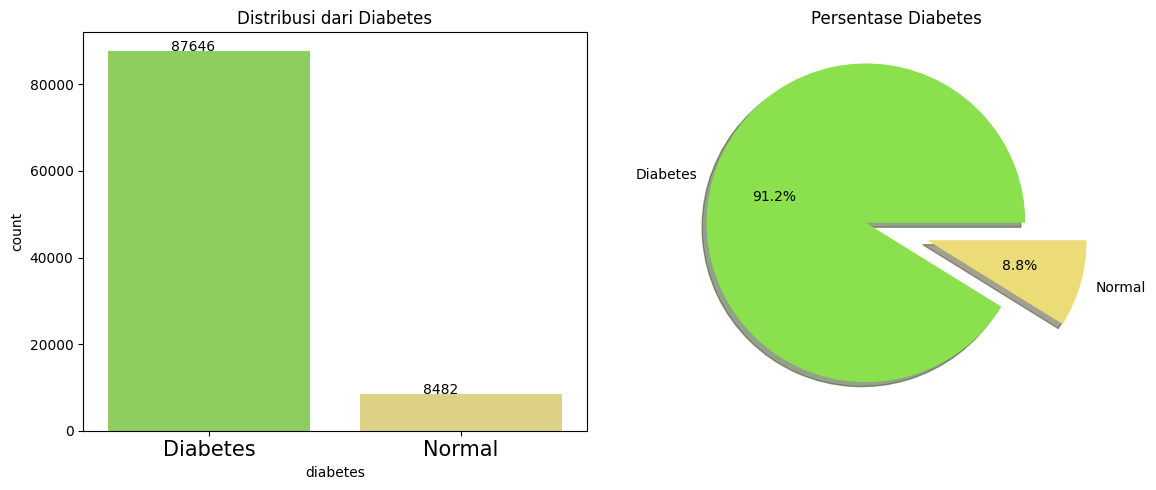

In [10]:
hd_label = ['Diabetes', 'Normal']
hd_color = ["#8be04e", "#ebdc78"]

# checking plot of diabetes distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Countplot
plt.subplot(1, 2, 1)
hd_plot = sns.countplot(x="diabetes", data=diabetic_disease, order=diabetic_disease['diabetes'].value_counts().index, hue="diabetes", palette=hd_color, legend=False)
hd_plot.set_title('Distribusi dari Diabetes')

# Manually set tick labels
hd_plot.set_xticks([0, 1])  # Ensure tick locations are properly aligned
hd_plot.set_xticklabels(hd_label, fontsize=15)  # Set custom labels

# Annotate bars with counts
for p in hd_plot.patches:
   hd_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
hd_pie = diabetic_disease['diabetes'].value_counts()
hd_pie = hd_pie.plot.pie(explode=[0.2, 0.2], labels=hd_label, autopct='%1.1f%%', shadow=True, colors=hd_color)
hd_pie.set_title(label='Persentase Diabetes')

plt.axis('off')  # Hide axis for pie chart
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("ua-countplot diabetes.png")  # Save the graph
plt.show()

2.   Countplot distribusi gender

      Menampilkan jumlah frekuensi data gender (Male and Female). Datap diketahu bahwa distribusi pasien wanita lebih banyak dari pada pasian pria.

<ipython-input-11-ebe74527729d>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sex_plot.set_xticklabels(sex_label, fontsize=15)


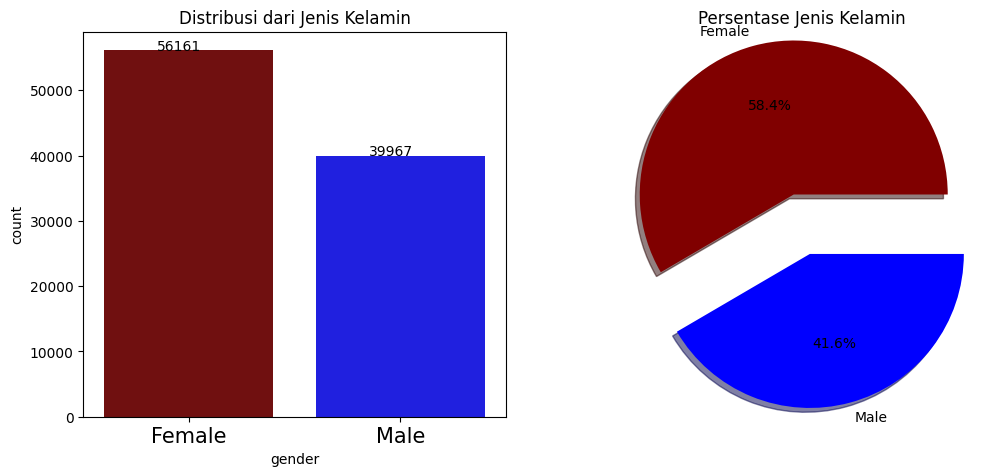

In [11]:
sex_label = diabetic_disease['gender'].value_counts().index.tolist()  # Get unique gender values as labels
sex_color = ['maroon', 'blue']  # Color options

# Checking plot of sex
plt.figure(figsize=(12, 5))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
sex_plot = sns.countplot(x=diabetic_disease.gender, palette=sex_color, hue=diabetic_disease.gender, dodge=False, legend=False)
sex_plot.set_title('Distribusi dari Jenis Kelamin')
sex_plot.set_xticklabels(sex_label, fontsize=15)
for p in sex_plot.patches:
    sex_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
sex_pie = diabetic_disease['gender'].value_counts()
sex_pie = sex_pie.plot.pie(explode=[0.2] * len(sex_label), labels=sex_label, autopct='%1.1f%%', shadow=True, colors=sex_color)
sex_pie.set_title(label='Persentase Jenis Kelamin')
plt.axis('off')
plt.savefig("ua-countplot gender.png")  # Save the graph
plt.show()

3. Distribusi Smoking History

    Countplot Menampilkan jumlah frekuensi data smoking history. Dapat diketahui dari grafik bahwa data 'No Info' memiliki jumlah paing banyak. Jumlah paling banyak ke dua diduduki olehh pasien yang tdak pernah merokok dengan label `never`.


<ipython-input-12-f7cad8bc124a>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  smoking_plot.set_xticklabels(smoking_label, fontsize=11)


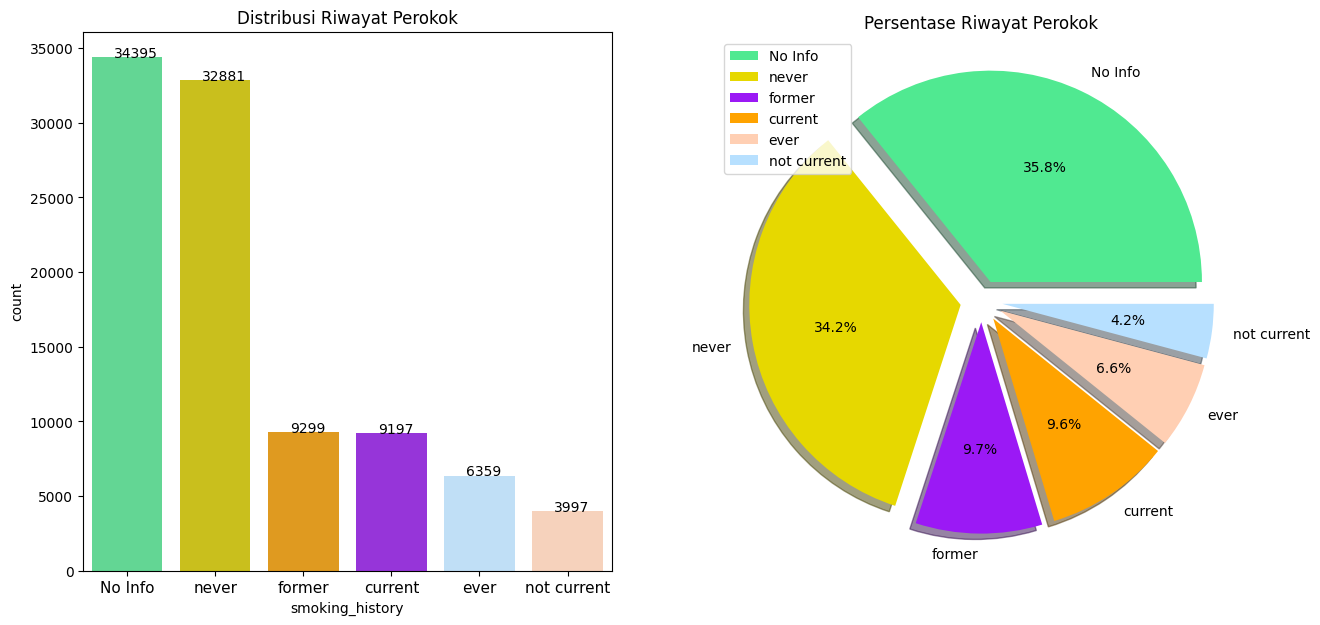

In [12]:
smoking_label = ['No Info', 'never', 'former', 'current', 'ever', 'not current']
smoking_colors = ["#50e991", "#e6d800", "#9b19f5", "#ffa300", "#ffcfb3", "#b7e0ff"]

# Checking plot of smoking history
plt.figure(figsize=(15, 7))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
smoking_plot = sns.countplot(x=diabetic_disease.smoking_history,
                             order=diabetic_disease.smoking_history.value_counts().index,
                             palette=smoking_colors,
                             hue=diabetic_disease.smoking_history,
                             dodge=False,
                             legend=False)
smoking_plot.set_title('Distribusi Riwayat Perokok')
smoking_plot.set_xticklabels(smoking_label, fontsize=11)

for p in smoking_plot.patches:
    smoking_plot.annotate('{:.0f}'.format(p.get_height()),
                          (p.get_x() + 0.25, p.get_height() + 0.01))

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
smoking_pie = diabetic_disease['smoking_history'].value_counts()

# Ensure the same order for both subplots by using the same labels and colors
smoking_pie = smoking_pie.plot.pie(explode=[0.1] * len(smoking_label),  # Adjust for the number of wedges
                                   labels=smoking_label,  # Set the labels in the correct order
                                   colors=smoking_colors,  # Use the same colors
                                   autopct='%1.1f%%',
                                   shadow=True)
smoking_pie.set_title(label='Persentase Riwayat Perokok')

plt.legend()
plt.axis('off')
plt.savefig("ua-rokok.png")  # Save the graph
plt.show()

4.   Countplot Distribusi Hypertension
      
      Grafik menampilkan distribusi pasien dengan riwayat tekanan darah tinggi (_hypertension_). Didapatkan 92.2% pasien tidak menderita tekanan darah tinggi.


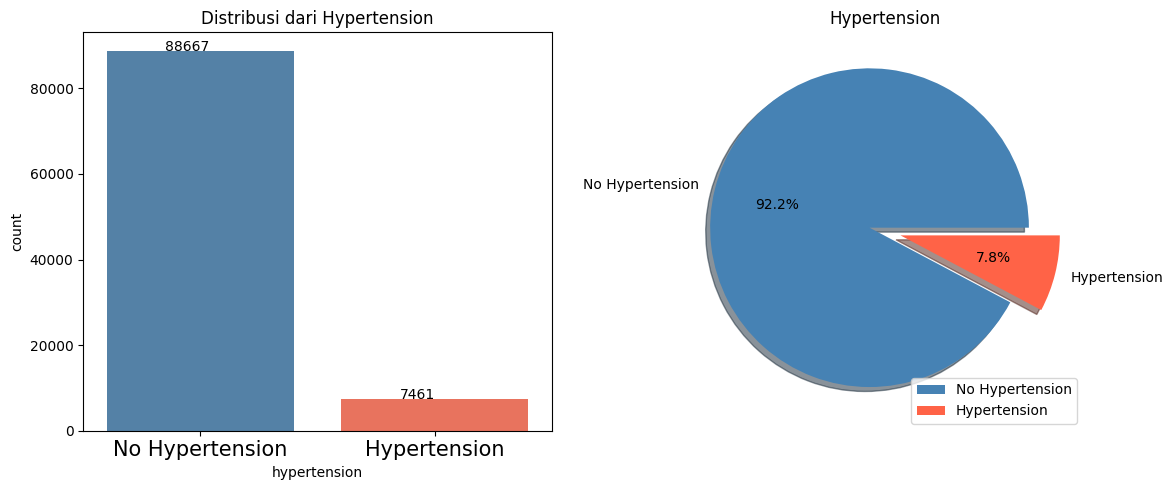

In [13]:
# Define color palette and labels
hypertension_color = ['#4682B4','#FF6347']
hypertension_label = ['No Hypertension', 'Hypertension']

plt.figure(figsize=(12, 5))

# Subplot 1: Countplot
plt.subplot(1, 2, 1)
hypertension_plot = sns.countplot(
    x='hypertension',
    data=diabetic_disease,
    order=diabetic_disease.hypertension.value_counts().index,
    hue='hypertension',  # Assigning 'x' variable to 'hue' to avoid warning
    palette=hypertension_color,
    legend=False  # Disable legend if unnecessary
)
hypertension_plot.set_title('Distribusi dari Hypertension')

# Set tick labels and annotate bars
hypertension_plot.set_xticks([0, 1])  # Manually set tick locations
hypertension_plot.set_xticklabels(hypertension_label, fontsize=15)  # Set custom tick labels

for p in hypertension_plot.patches:
    hypertension_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
hypertension_pie = diabetic_disease['hypertension'].value_counts()
hypertension_pie = hypertension_pie.plot.pie(
    explode=[0.1, 0.1],
    labels=hypertension_label,
    colors=hypertension_color,
    autopct='%1.1f%%',
    shadow=True
)
hypertension_pie.set_title('Hypertension')
plt.legend()
plt.axis('off')
plt.savefig("ua-hypertension.png")  # Save the graph
plt.tight_layout()
plt.show()

5.   Countplot Distribusi Pasien Sakit Jantung

Grafik menampilkan distribusi pasien dengan riwayat sakit jantung (_heart disease_). Didapatkan 95.9% pasien tidak menderita sakit jantung.



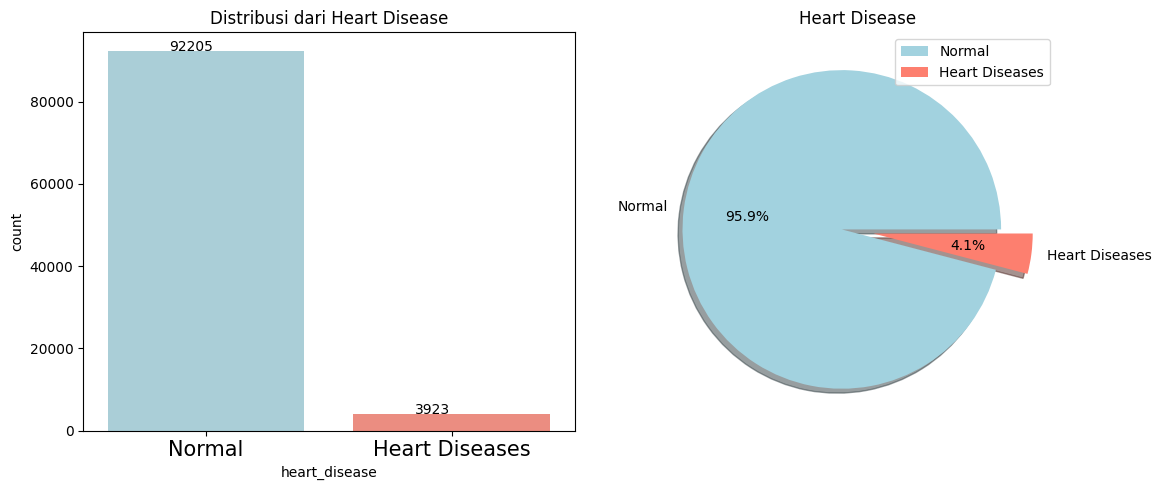

In [14]:
# Define labels and color palette
heart_disease_label = ['Normal', 'Heart Diseases']
heart_disease_color = ["#a2d2dF", "#fd7f6f"]

# Checking plot of heart disease
plt.figure(figsize=(12, 5))

# Subplot 1: Countplot
plt.subplot(1, 2, 1)
heart_disease_plot = sns.countplot(
    x='heart_disease',
    data=diabetic_disease,
    order=diabetic_disease.heart_disease.value_counts().index,
    hue='heart_disease',  # Assign 'x' variable to 'hue' to avoid warning
    palette=heart_disease_color,
    legend=False  # Disable legend if unnecessary
)
heart_disease_plot.set_title('Distribusi dari Heart Disease')

# Set tick labels and annotate bars
heart_disease_plot.set_xticks([0, 1])  # Set tick locations manually
heart_disease_plot.set_xticklabels(heart_disease_label, fontsize=15)  # Apply custom labels

for p in heart_disease_plot.patches:
    heart_disease_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
heart_disease_pie = diabetic_disease['heart_disease'].value_counts()
heart_disease_pie = heart_disease_pie.plot.pie(
    explode=[0.1, 0.1],
    labels=heart_disease_label,
    colors=heart_disease_color,
    autopct='%1.1f%%',
    shadow=True
)
heart_disease_pie.set_title('Heart Disease')
plt.legend()
plt.axis('off')
plt.savefig("ua-heart disease.png")  # Save the graph
plt.tight_layout()
plt.show()

## **BIVARIATIVE ANALYSIS DATA CATEGORICAL**

> Add blockquote



# 1. Diabetes vs gender

Mengecek hubungan antara penderita diabetes dan gender. didapatkan 4035 penderita diabetes laki- laki, yakni 11.2% dari total pasien laki-laki. Didapatkan pula 4447 penderita diabetes wanita, yakni 8.6% dari total pasien wanita.

<ipython-input-15-1dc73c1168d9>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gender_plot.set_xticklabels(gender_label, fontsize=11)


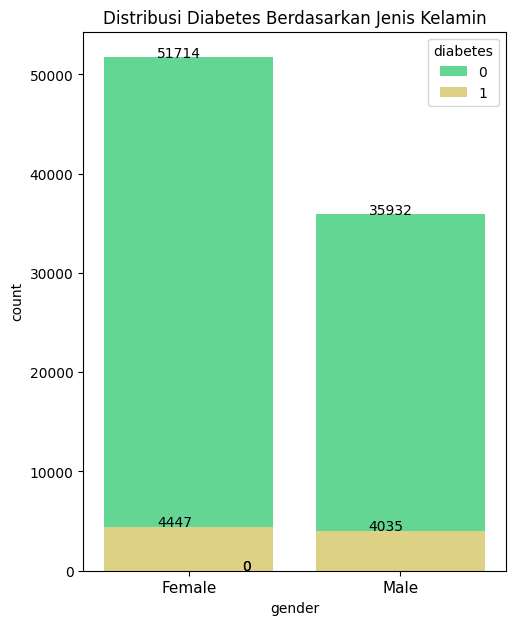

In [15]:
# Create a count plot with gender on the x-axis and the count of diabetes cases on the y-axis
plt.figure(figsize=(12, 7))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
gender_label = diabetic_disease['gender'].value_counts().index.tolist()  # Automatically get unique gender labels
gender_colors = ['#50e991', '#ebdc78']  # Add colors for gender categories

# Create count plot with gender on x-axis and diabetes on hue
gender_plot = sns.countplot(x=diabetic_disease.gender,
                            hue=diabetic_disease.diabetes,
                            palette=gender_colors,
                            dodge=False)

# Set plot title and labels
gender_plot.set_title('Distribusi Diabetes Berdasarkan Jenis Kelamin')
gender_plot.set_xticklabels(gender_label, fontsize=11)

# Annotate each bar with the count
for p in gender_plot.patches:
    gender_plot.annotate('{:.0f}'.format(p.get_height()),
                         (p.get_x() + 0.25, p.get_height() + 0.01))

plt.savefig("ba-diabetes vs gender.png")  # Save the graph
plt.show()

# 2. Diabetes vs Smoking history

Mengecek hubungan diabetes dengan smoking history.

<ipython-input-16-e9f3195667e1>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  smoking_plot = sns.countplot(data=diabetic_disease,
<ipython-input-16-e9f3195667e1>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  smoking_plot.set_xticklabels(smoking_label, fontsize=11)


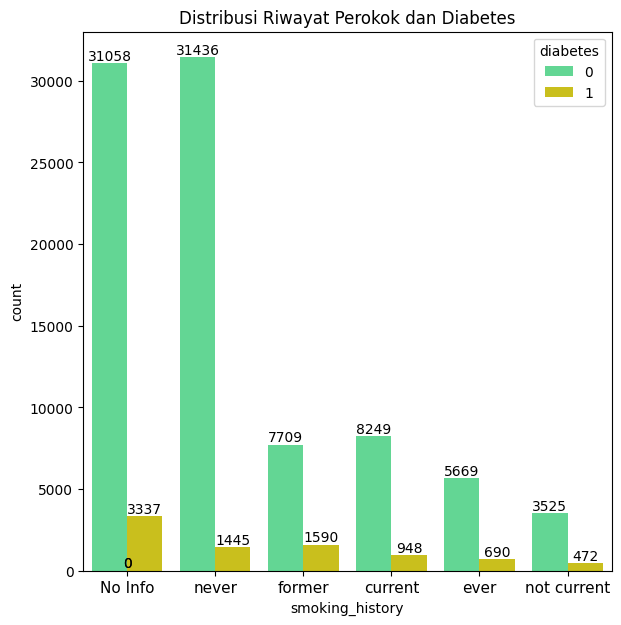

In [16]:
smoking_label = ['No Info', 'never', 'former', 'current', 'ever', 'not current']
smoking_colors = ["#50e991", "#e6d800", "#9b19f5", "#ffa300", "#ffcfb3", "#b7e0ff"]

# Checking plot of smoking history with diabetes as the y-axis
plt.figure(figsize=(15, 7))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
smoking_plot = sns.countplot(data=diabetic_disease,
                             x='smoking_history',
                             hue='diabetes',  # Use diabetes as hue
                             order=diabetic_disease.smoking_history.value_counts().index,
                             palette=smoking_colors,
                             dodge=True)  # Use dodge=True for side-by-side bars

# Set title and x-tick labels
smoking_plot.set_title('Distribusi Riwayat Perokok dan Diabetes')
smoking_plot.set_xticklabels(smoking_label, fontsize=11)

# Annotate each bar with the count
for p in smoking_plot.patches:
    smoking_plot.annotate('{:.0f}'.format(p.get_height()),
                          (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                          ha='center', va='bottom')

plt.savefig("ba-diabetes vs smoking history.png")  # Save the graph
plt.show()

# **3. Diabetes vs Hypertension**

Mengecek hubungan diabetes dengan penyakit tekanan darah tinggi. Didapatkan 7.7% penderita diabetes non Hypertensi dan 38.8% penderita diabetes dan hypertensi.

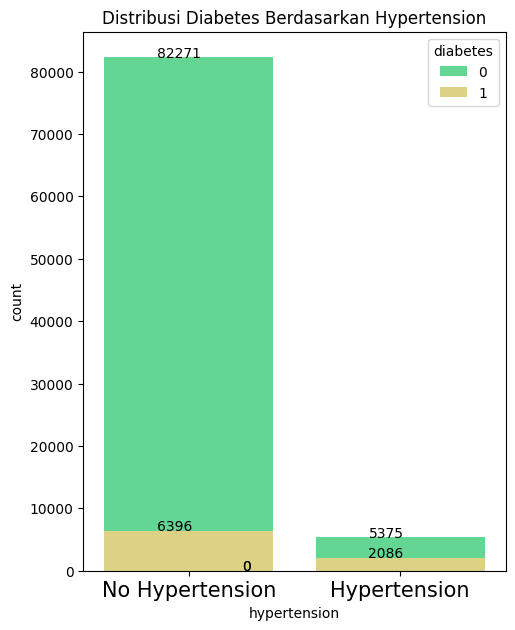

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a count plot with gender on the x-axis and the count of diabetes cases on the y-axis
plt.figure(figsize=(12, 7))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
hypertension_label = diabetic_disease['hypertension'].value_counts().index.tolist()  # Automatically get unique gender labels
hypertension_colors = ['#50e991', '#ebdc78']  # Add colors for gender categories

# Create count plot with gender on x-axis and diabetes on hue
hypertension_plot = sns.countplot(x=diabetic_disease.hypertension,
                            hue=diabetic_disease.diabetes,
                            palette=hypertension_colors,
                            dodge=False)

# Set plot title and labels
hypertension_plot.set_title('Distribusi Diabetes Berdasarkan Hypertension')
hypertension_plot.set_xticks([0, 1])  # Set tick locations manually
hypertension_plot.set_xticklabels(['No Hypertension', 'Hypertension'], fontsize=15)

# Annotate each bar with the count
for p in hypertension_plot.patches:
    hypertension_plot.annotate('{:.0f}'.format(p.get_height()),
                         (p.get_x() + 0.25, p.get_height() + 0.01))

plt.show()
for p in hypertension_plot.patches:
    hypertension_plot.annotate('{:.0f}'.format(p.get_height()),
                         (p.get_x() + 0.25, p.get_height() + 0.01))

plt.savefig("ba-diabetes vs hypertension.png")  # Save the graph
plt.show()

# **4. Diabetes vs Heart disease**


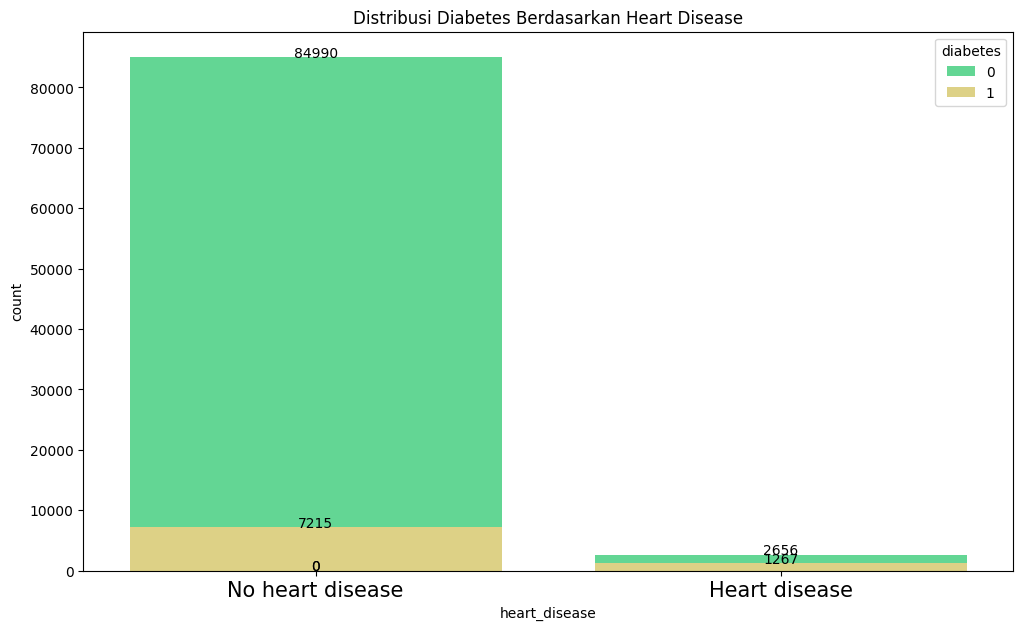

In [18]:
# Create a count plot with heart disease on the x-axis and the count of diabetes cases on the y-axis
plt.figure(figsize=(12, 7))

# Subplot 1: Bar chart
heartdisease_label = ['No heart disease', 'Heart disease']  # Define custom labels
heartdisease_colors = ['#50e991', '#ebdc78']  # Colors for diabetes categories

# Create count plot with heart disease on x-axis and diabetes on hue
heartdisease_plot = sns.countplot(x=diabetic_disease.heart_disease,
                                  hue=diabetic_disease.diabetes,
                                  palette=heartdisease_colors,
                                  dodge=False)

# Set plot title and labels
heartdisease_plot.set_title('Distribusi Diabetes Berdasarkan Heart Disease')

# Set custom x-tick labels: 0 = No heart disease, 1 = Heart disease
heartdisease_plot.set_xticks([0, 1])  # Ensure ticks are set at 0 and 1
heartdisease_plot.set_xticklabels(heartdisease_label, fontsize=15)

# Annotate each bar with the count
for p in heartdisease_plot.patches:
    heartdisease_plot.annotate('{:.0f}'.format(p.get_height()),
                               (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                               ha='center')

plt.savefig("ba-diabetes vs heart disease.png")  # Save the graph
plt.show()

In [19]:
categorical_feature

['gender', 'smoking_history', 'hypertension', 'heart_disease']

Dengan mengamati rata-rata harga relatif terhadap fitur _categorical_ di atas, didapatkan _insight_ sebagai berikut:

Diabetes [0] menunjukkan bahwa pasien Normal
Diabetes [1] menunjukkan bahwa pasien memiliki penyakit jantung
- Pada fitur `gender`,didapatkan bahwa penyakit menyerang lebih banyak pada psien wanita. Grafik menunjukkan 4035 penderita diabetes laki- laki dan  4447 penderita diabetes wanita.

  Namun dari segi persentase,diaberes diderita 11.2% dari total pasien laki-laki dan 8.6% dari total pasien wanita.

- Pada fitur `Smoking History`, penderita diabetes terbesar dengan kategori selain `No Info` didapatkan oleh mantan perokok `former` dengan 1590 penderita yakni 17% dari seluruh `former` smoker.

- Pada fitur `Hypertension`, 2086 pasien menderita hypertension dan diabetes, hal ini memiliki pesentase yg tinggi yakni 27.8% dibandingkan dengan pasien penderita hypertension yang tidak memiliki diabetes.
- Pada fitur `heart_disease`, rerata pasien yang memiliki penyakit jantung dan menderita diabetes berjumlah 1267 pasien, yakni 38% dari pasien penderita penyakit Jantung.

## **Analisis terhadap fitur Numerical**

1. **Memilih fitur data numerik**
digunakan untuk memilih hanya kolom dengan tipe data numerik (`int64` dan `float64`) dari Data Frame `diabetic_disease` sebagai langkah pertama melakukan analisis selanjutnya.

In [20]:
diabetic_disease.select_dtypes(['int64', 'float64'])

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


2. **Menggunakan fungsi Correlation** (`corr`)


Perlu diketahui fitur mana saja yang memiliki hubungan paling kuat dengan penyakit diabetes. Hal ini dapat diketahui dengan menggunaka fungsi `corr`

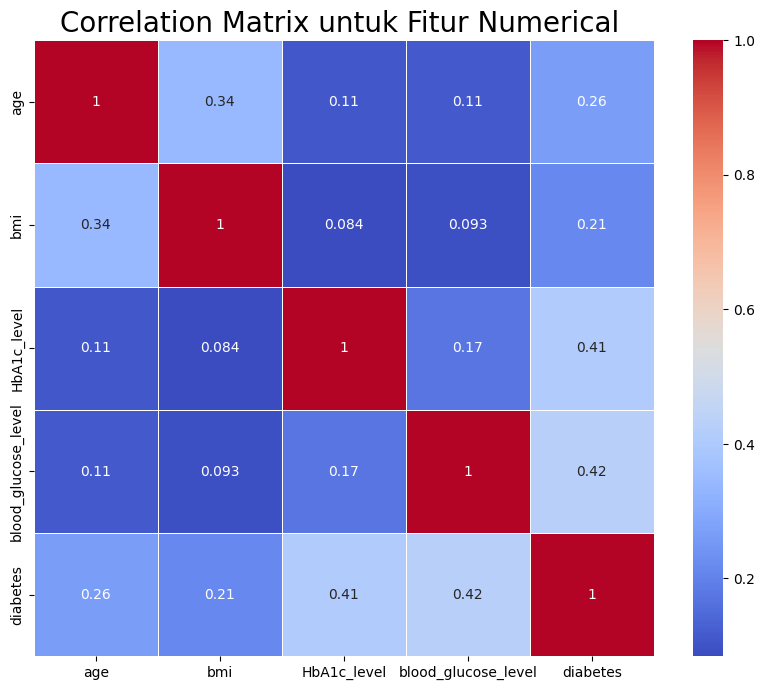

In [21]:
# Select only numeric features for correlation calculation
numeric_features = diabetic_disease.drop(['hypertension', 'heart_disease'], axis=1).select_dtypes(['int64', 'float64'])

# Calculate the correlation matrix using only numeric features
correlation_matrix = numeric_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerical ", size=20)
plt.savefig("Correlation Matrix untuk Fitur Numerical.png")  # Save the graph
plt.show()
correlation_matrix = numeric_features.corr()

  Untuk memprediksi diabetes, fitur-fitur dengan korelasi positif yang paling kuat umumnya merupakan yang paling berguna, karena lebih mungkin memberikan kontribusi signifikan dalam membedakan kasus diabetes dan non-diabetes. Dalam hal ini, fitur yang paling berpotensi berguna adalah:

  1. **blood_glucose_level** (0.424)
  
  Memiliki korelasi terkuat dengan diabetes. Tingkat glukosa darah berkaitan langsung dengan diabetes, sehingga fitur ini kemungkinan menjadi prediktor yang kuat.

2. **HbA1c_level (0.406)**  

  Memiliki korelasi moderat dengan diabetes dan merupakan ukuran standar dalam mendiagnosis diabetes, menjadikannya sangat relevan.

3. **Age (0.265)**

  Meskipun korelasinya lebih lemah, usia sering menjadi faktor risiko diabetes, sehingga mungkin dapat meningkatkan kemampuan model untuk memprediksi diabetes.

4. **BMI (0.215)**

 Korelasi positif BMI menunjukkan bahwa fitur ini dapat membantu membedakan individu dengan dan tanpa diabetes, mengingat obesitas sering dikaitkan dengan risiko diabetes.

5. **Hypertension (0.196)** dan **Heart Disease (0.171)**

 Memiliki korelasi terlemah di antara fitur yang tercantum, namun tetap dapat berperan. Hipertensi dan penyakit jantung sering dikaitkan dengan diabetes, meskipun mungkin bukan sebagai prediktor utama.

3. **Plot Fitur-Fitur Numerik**

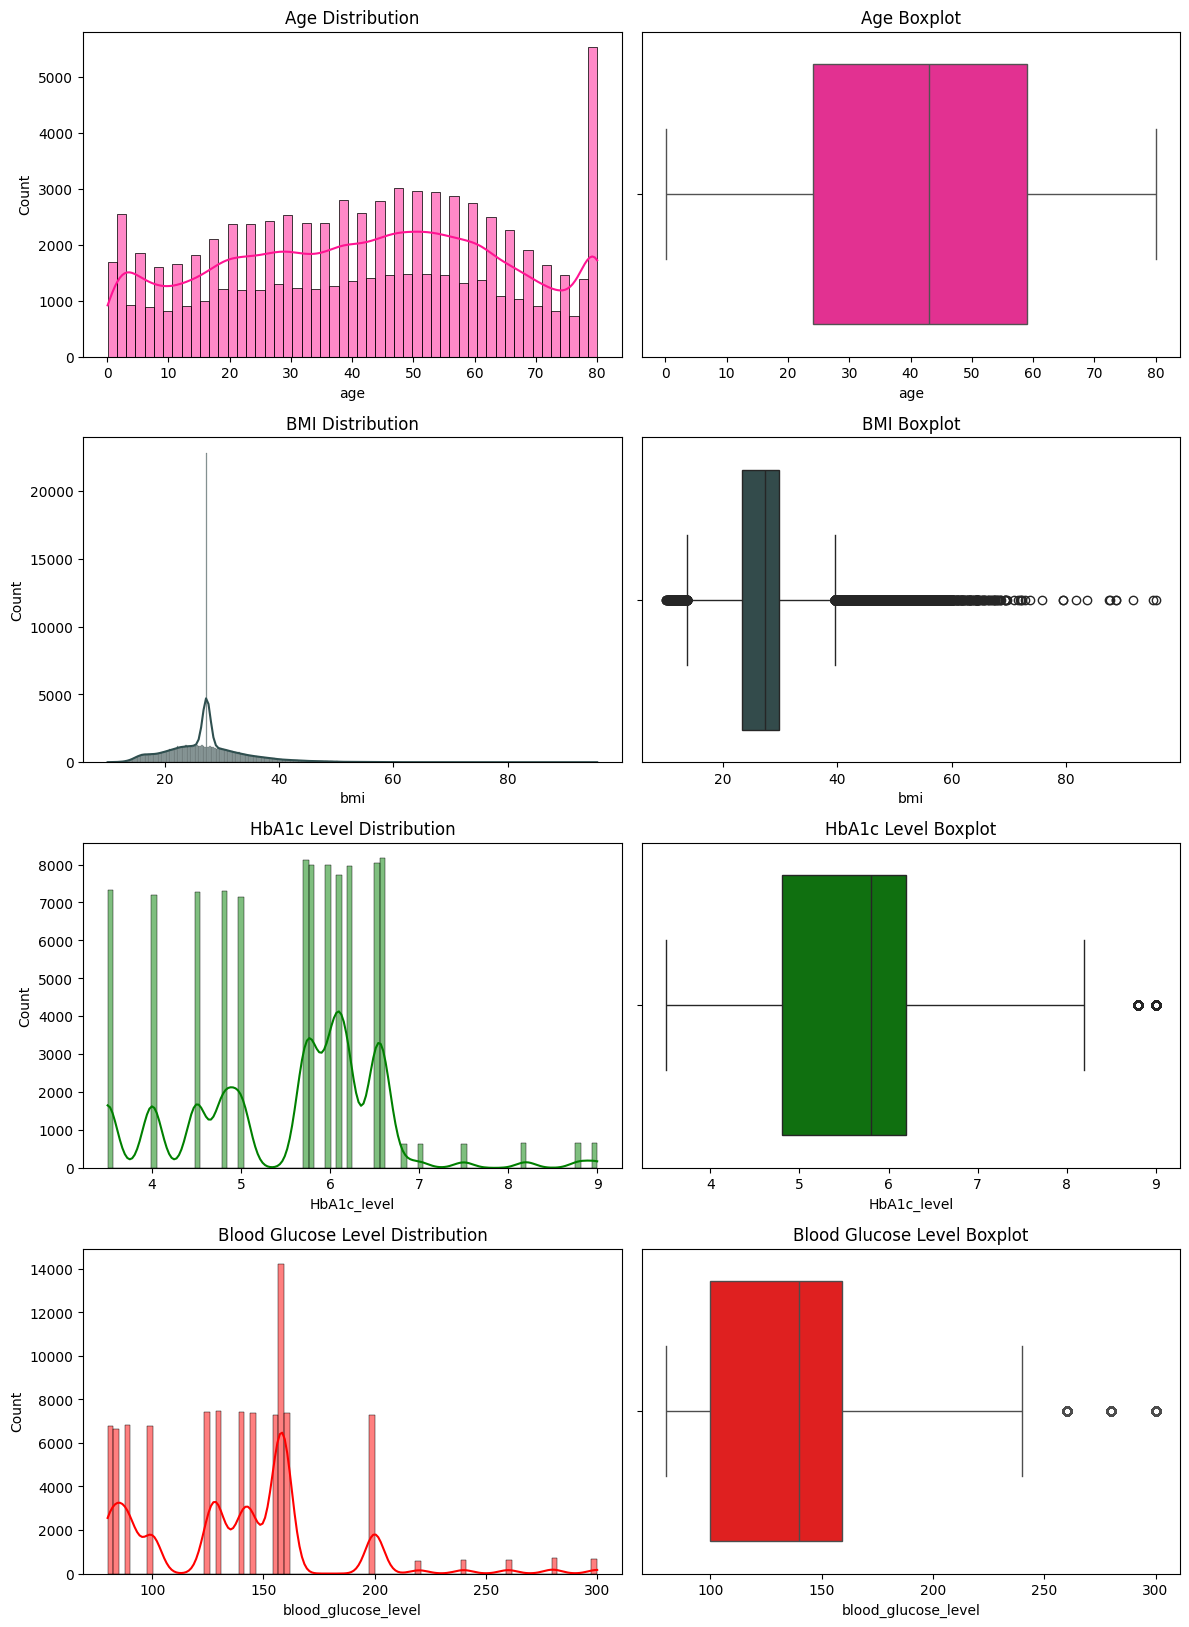

In [22]:
plt.figure(figsize=(12, 20))

# 1st subplot: Age distribution (histogram)
plt.subplot(5, 2, 1)
sns.histplot(diabetic_disease['age'], kde=True, color='DeepPink')
plt.title('Age Distribution')

# 2nd subplot: Age boxplot
plt.subplot(5, 2, 2)
sns.boxplot(x=diabetic_disease['age'], color='DeepPink')
plt.title('Age Boxplot')

# 3rd subplot: BMI distribution (histogram)
plt.subplot(5, 2, 3)
sns.histplot(diabetic_disease['bmi'], kde=True, color='DarkSlateGray')
plt.title('BMI Distribution')

# 4th subplot: BMI boxplot
plt.subplot(5, 2, 4)
sns.boxplot(x=diabetic_disease['bmi'], color='DarkSlateGray')
plt.title('BMI Boxplot')

# 5th subplot: HbA1c level distribution (histogram)
plt.subplot(5, 2, 5)
sns.histplot(diabetic_disease['HbA1c_level'], kde=True, color='Green')
plt.title('HbA1c Level Distribution')

# 6th subplot: HbA1c level boxplot
plt.subplot(5, 2, 6)
sns.boxplot(x=diabetic_disease['HbA1c_level'], color='Green')
plt.title('HbA1c Level Boxplot')

# 7th subplot: Blood glucose level distribution (histogram)
plt.subplot(5, 2, 7)
sns.histplot(diabetic_disease['blood_glucose_level'], kde=True, color='Red')
plt.title('Blood Glucose Level Distribution')

# 8th subplot: Blood glucose level boxplot
plt.subplot(5, 2, 8)
sns.boxplot(x=diabetic_disease['blood_glucose_level'], color='Red')
plt.title('Blood Glucose Level Boxplot')

# Adjust layout
plt.tight_layout()
plt.savefig("ua-numerical.png")  # Save the graph
plt.show()

 2. Pair plot fitur-fitur numerik

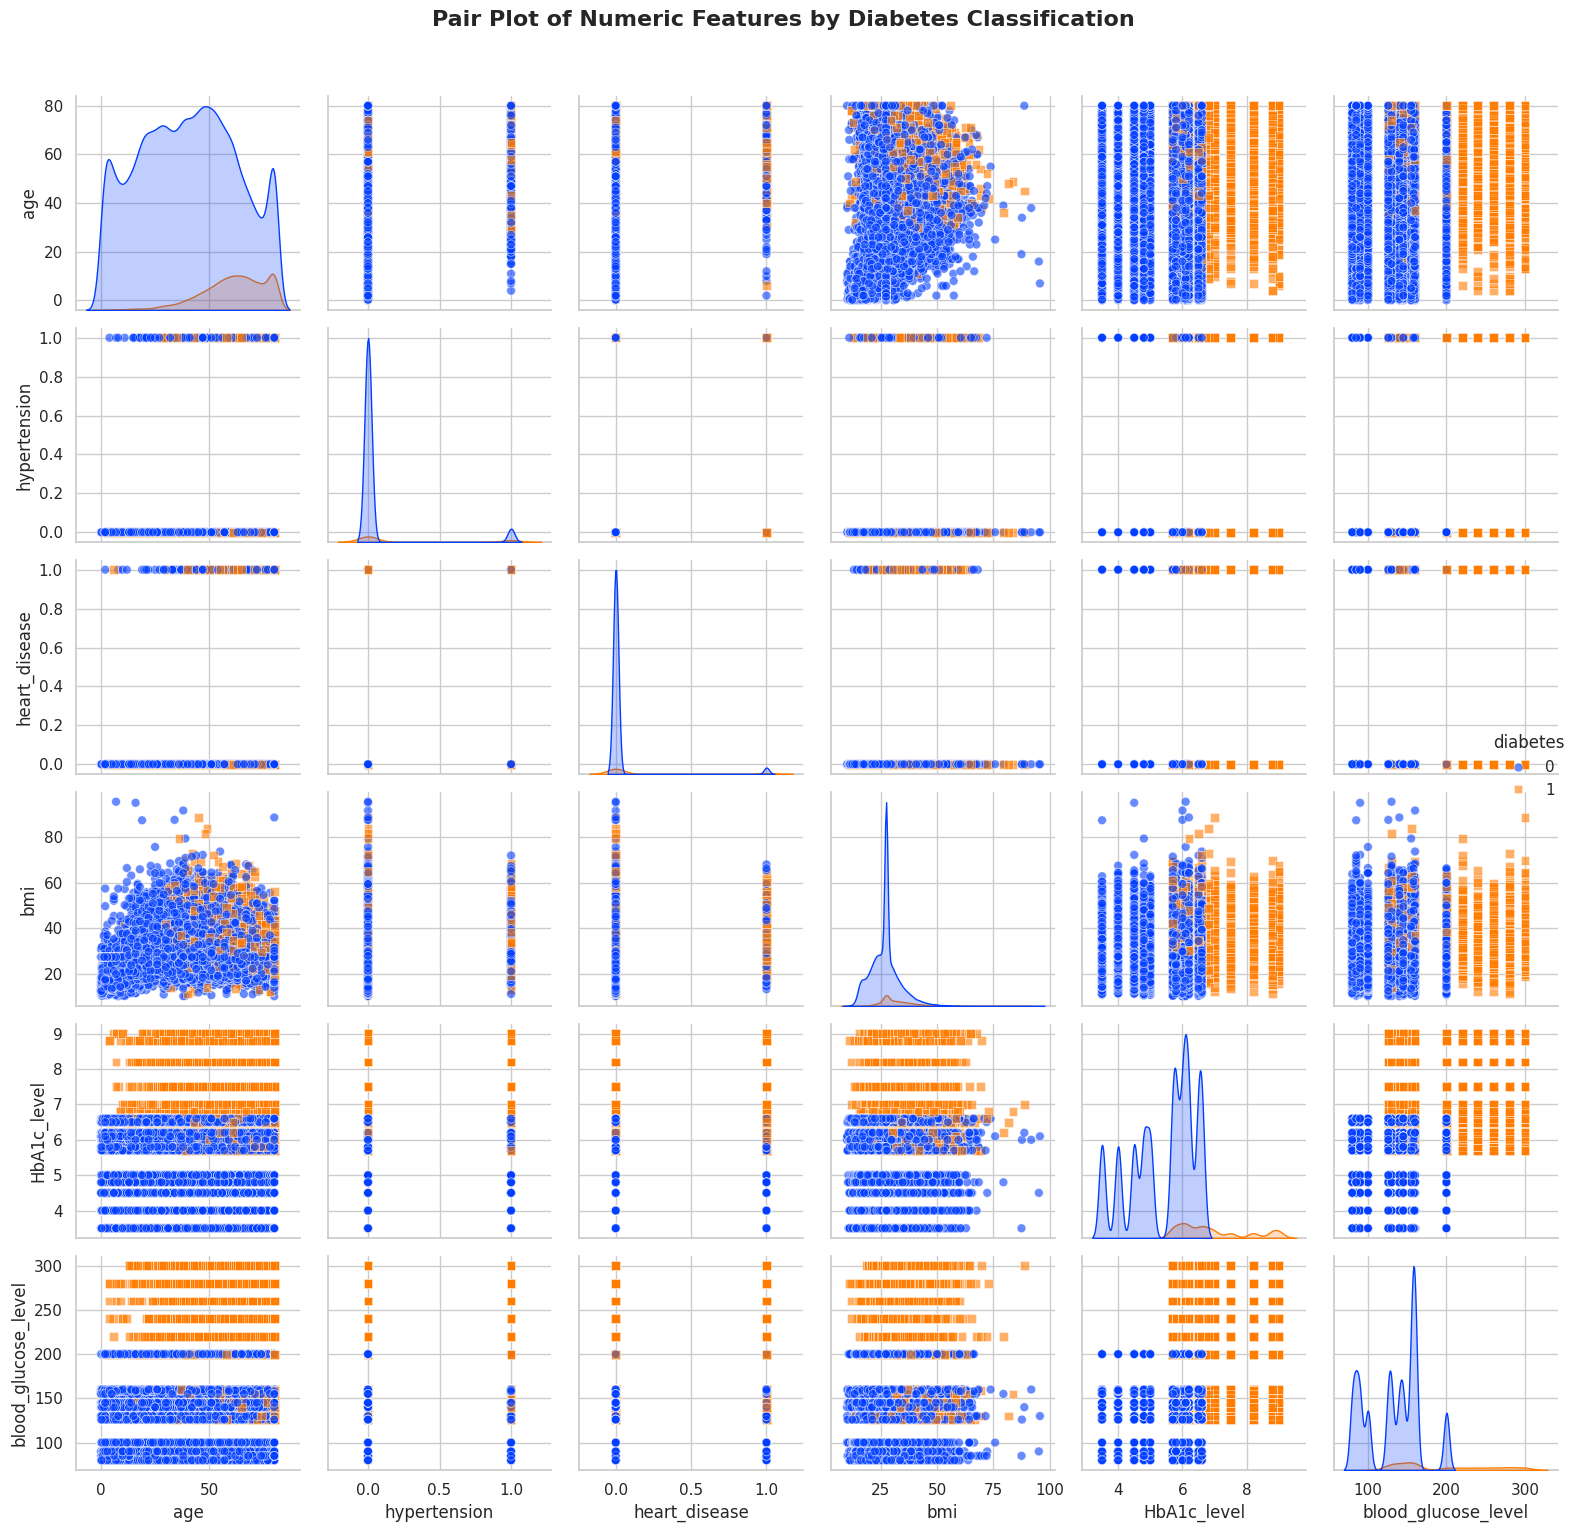

In [23]:
# Pair plot for numeric features
sns.set(style="whitegrid")

# Enhanced Pair Plot
sns.pairplot(
    diabetic_disease,
    hue='diabetes',
    diag_kind='kde',  # Use KDE for diagonal plots
    palette='bright',  # Custom color palette
    markers=["o", "s"],  # Different marker styles for each category
    plot_kws={'alpha': 0.6, 's': 40}  # Transparency and size of markers
)

# Update title and display plot
plt.suptitle('Pair Plot of Numeric Features by Diabetes Classification', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("Pair Plot of Numeric Features by Diabetes Classification.png")  # Save the graph
plt.show()

# **BIVARIATIVE ANALYSIS DATA NUMERICAL**


1. Hubungan _Diabetic Disease_ dan _BMI_

  Didapatkan bahwa rerata dan median data BMI penderita diabetes lebih tinggi dari pada bukan penderita diabetes.

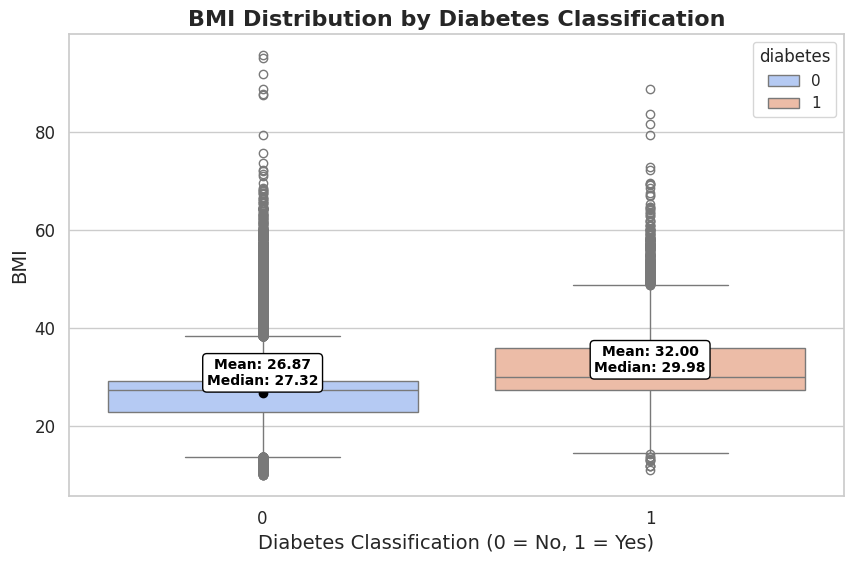

In [24]:
# Set style for the plot
sns.set(style="whitegrid", palette="pastel")

# Enhanced Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='diabetes',
    y='bmi',
    hue='diabetes',
    data=diabetic_disease,
    palette="coolwarm",  # Color palette
    showmeans=True,  # Show mean as a marker
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Annotate with mean and median in a tidy manner
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    # Calculate median and mean values
    median = diabetic_disease[diabetic_disease['diabetes'] == i]['bmi'].median()
    mean = diabetic_disease[diabetic_disease['diabetes'] == i]['bmi'].mean()

    # Combine mean and median into a single formatted string
    annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

    # Add annotation at the respective position
    ax.text(i, median + 0.5, annotation_text,
            ha='center', va='bottom',
            fontweight='bold', color="black",
            fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Update title and axis labels
plt.title('BMI Distribution by Diabetes Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Classification (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.savefig("ba-diabetes vs bmi.png")  # Save the graph
plt.show()

 2. Hubungan Diabetic Disease dan level HbA1c

Didapatkan bahwa rerata dan median HbA1c penderita diabetes lebih tinggi dari pada bukan penderita diabetes.

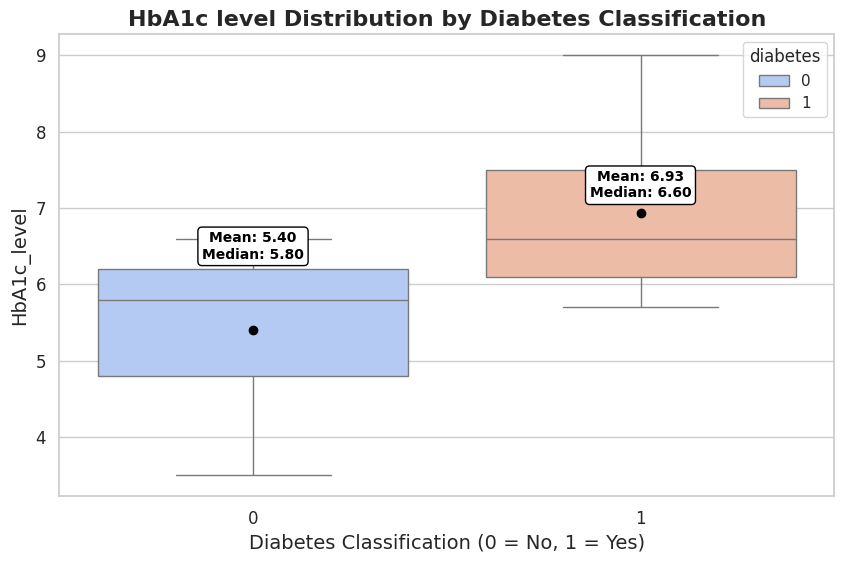

In [25]:
# Set style for the plot
sns.set(style="whitegrid", palette="pastel")

# Enhanced Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='diabetes',
    y='HbA1c_level',
    hue='diabetes',
    data=diabetic_disease,
    palette="coolwarm",  # Color palette
    showmeans=True,  # Show mean as a marker
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Annotate with mean and median in a tidy manner
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    # Calculate median and mean values
    median = diabetic_disease[diabetic_disease['diabetes'] == i]['HbA1c_level'].median()
    mean = diabetic_disease[diabetic_disease['diabetes'] == i]['HbA1c_level'].mean()

    # Combine mean and median into a single formatted string
    annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

    # Add annotation at the respective position
    ax.text(i, median + 0.5, annotation_text,
            ha='center', va='bottom',
            fontweight='bold', color="black",
            fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Update title and axis labels
plt.title('HbA1c level Distribution by Diabetes Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Classification (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('HbA1c_level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.savefig("ba-diabetes vs HbA1c.png")
plt.show()

3. Hubungan Diabetic Disease dan age

  Didapatkan bahwa rerata dan median HbA1c penderita diabetes lebih tinggi dari pada bukan penderita diabetes. Didapatkan rata-rata penderita diabetes lebih tinggi dari bukan penderita, yakni 60 tahun, sedangkan bukan penderita diabetes adalah 40 tahun.

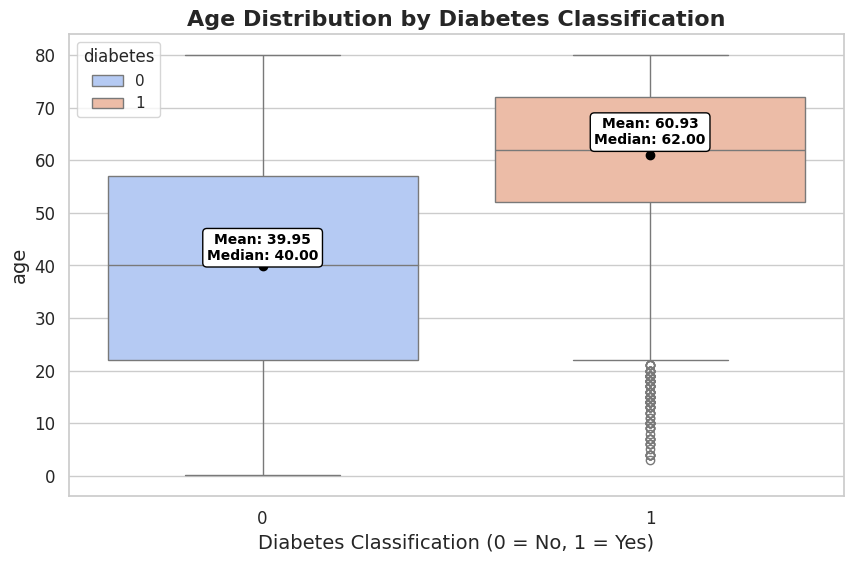

In [26]:
# Set style for the plot
sns.set(style="whitegrid", palette="pastel")

# Enhanced Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='diabetes',
    y='age',
    hue='diabetes',
    data=diabetic_disease,
    palette="coolwarm",  # Color palette
    showmeans=True,  # Show mean as a marker
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Annotate with mean and median in a tidy manner
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    # Calculate median and mean values
    median = diabetic_disease[diabetic_disease['diabetes'] == i]['age'].median()
    mean = diabetic_disease[diabetic_disease['diabetes'] == i]['age'].mean()

    # Combine mean and median into a single formatted string
    annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

    # Add annotation at the respective position
    ax.text(i, median + 0.5, annotation_text,
            ha='center', va='bottom',
            fontweight='bold', color="black",
            fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Update title and axis labels
plt.title('Age Distribution by Diabetes Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Classification (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.savefig("ba-diabetes vs age.png")
plt.show()

 4. Hubungan Diabetic Disease dan level glukosa dalam darah

   Didapatkan bahwa rerata dan median level glukosa dalam darah penderita diabetes lebih tinggi dari pada bukan penderita diabetes yakni 194, sedangkan bukan penderita diabetes adalah 132.

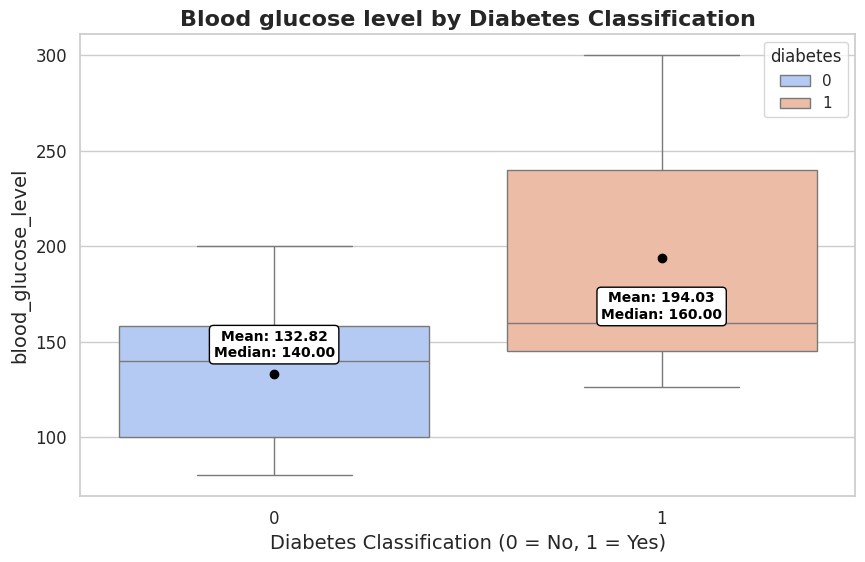

In [27]:
# Set style for the plot
sns.set(style="whitegrid", palette="pastel")

# Enhanced Boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='diabetes',
    y='blood_glucose_level',
    hue='diabetes',
    data=diabetic_disease,
    palette="coolwarm",  # Color palette
    showmeans=True,  # Show mean as a marker
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# Annotate with mean and median in a tidy manner
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    # Calculate median and mean values
    median = diabetic_disease[diabetic_disease['diabetes'] == i]['blood_glucose_level'].median()
    mean = diabetic_disease[diabetic_disease['diabetes'] == i]['blood_glucose_level'].mean()

    # Combine mean and median into a single formatted string
    annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

    # Add annotation at the respective position
    ax.text(i, median + 0.5, annotation_text,
            ha='center', va='bottom',
            fontweight='bold', color="black",
            fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Update title and axis labels
plt.title('Blood glucose level by Diabetes Classification', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Classification (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('blood_glucose_level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.savefig("ba-diabetes vs blood glucose.png")
plt.show()

# **MULTIVARIATIVE ANALYSIS DATA NUMERICAL**

  1. Hubungan fitur gender, BMI dan diabetes

  Di dapatkan pederita diabetes cenderung merupakan Wanita yang memiliki nilai BMI yang tinggi.

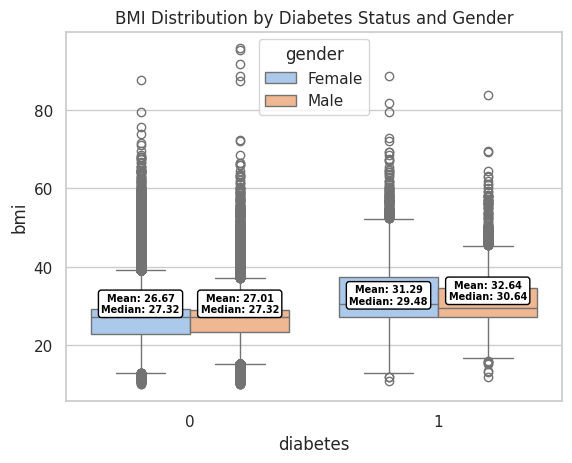

In [28]:
# Interaction between gender, BMI and diabetes
# Calculate mean and median of 'bmi' grouped by 'diabetes' and 'gender'
mean_median_bmi = diabetic_disease.groupby(['diabetes', 'gender'])['bmi'].agg(['mean', 'median']).reset_index()

# Overlay mean and median with tidy formatting
# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=diabetic_disease, ax=ax)
plt.title('BMI Distribution by Diabetes Status and Gender')

# Add combined mean and median annotations
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    for gender in diabetic_disease['gender'].unique():
        # Filter the data based on diabetes status and gender
        subset = diabetic_disease[(diabetic_disease['diabetes'] == i) & (diabetic_disease['gender'] == gender)]

        # Calculate median and mean
        median = subset['bmi'].median()
        mean = subset['bmi'].mean()

        # Combine mean and median into a single formatted string
        annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

        # Set a small horizontal offset for each gender to prevent overlap
        x_position = i - 0.2 if gender == 'Male' else i + 0.2

        # Add annotation at the respective position
        ax.text(x_position, median + 0.5, annotation_text,
                ha='center', va='bottom', fontweight='bold', color="black",
                fontsize=7, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.savefig("ma-diabetes vs bmi.png")
plt.show()



2.  Hubungan antara gender, Age and diabetes

Diadapatkan penderita diabetes cenderung merupakan Wanita yang rata-rata berusia 60 tahun.

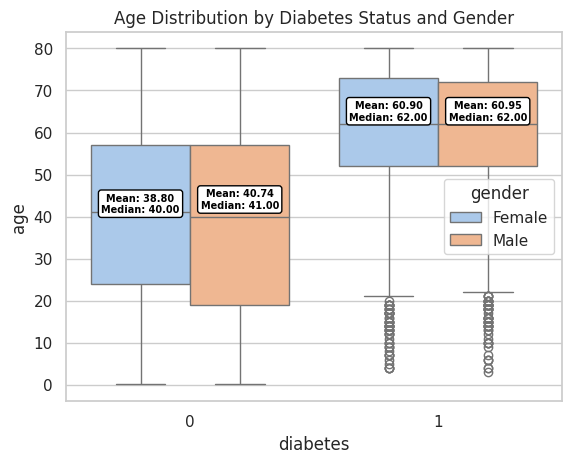

In [29]:
# Interaction between gender, BMI and diabetes
# Calculate mean and median of 'age' grouped by 'diabetes' and 'gender'
mean_median_bmi = diabetic_disease.groupby(['diabetes', 'gender'])['age'].agg(['mean', 'median']).reset_index()

# Overlay mean and median with tidy formatting
# Create the boxplot
fig, ax = plt.subplots()
sns.boxplot(x='diabetes', y='age', hue='gender', data=diabetic_disease, ax=ax)
plt.title('Age Distribution by Diabetes Status and Gender')

# Add combined mean and median annotations
for i in range(2):  # Assuming 'diabetes' has values 0 and 1
    for gender in diabetic_disease['gender'].unique():
        # Filter the data based on diabetes status and gender
        subset = diabetic_disease[(diabetic_disease['diabetes'] == i) & (diabetic_disease['gender'] == gender)]

        # Calculate median and mean
        median = subset['age'].median()
        mean = subset['age'].mean()

        # Combine mean and median into a single formatted string
        annotation_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}'

        # Set a small horizontal offset for each gender to prevent overlap
        x_position = i - 0.2 if gender == 'Male' else i + 0.2

        # Add annotation at the respective position
        ax.text(x_position, median + 0.5, annotation_text,
                ha='center', va='bottom', fontweight='bold', color="black",
                fontsize=7, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.savefig("ma-diabetes vs age vs gender.png")
plt.show()


## Data Preparation
Pada bagian ini Anda menerapkan dan menyebutkan teknik data preparation yang dilakukan. Teknik yang digunakan pada notebook dan laporan harus berurutan.

_Data preparation_ yang digunakan di antaranya:

1. Seleksi data: menyeleksi data apakah data tersebut ada yang kosong atau tidak, jika ada data kosong maka akan dihapus.

`isnull().sum()` merupakan _command_ yang digunakan untuk mengecek apakah terdapat data yang kosong atau _missing data_ dan menjumlahkan banyak datanya. Namun, tidak terdapat data kosong atau _missing data_.

In [30]:
# checking null dataset and sum it, if any
diabetic_disease.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


2. Menangani Outlier: melakukan pengechekan apakah data _diabetic disease_ memiliki data outlier.

Melakukan pengecekan apakah data `diabetic_disease` memiliki data outlier. Apabila terdapat data outlier, maka akan dihapus. Dalam menangani _outlier_, digunakan metode IQR. Ditemukan _outlier_ pada data `diabetic_disease`, hal ini ditemukan dengan melakukan visualisasi dengan `boxplot`. Untuk mengatasi _outlier_ yang ada, maka digunakan metode IQR. IQR bertujuan untuk mengapuskan outlier yang ada. Hasil akhir data dari outlier yang telah dihapuskan dapat dilihat dengan `shape`.

In [31]:
hd_outlier = diabetic_disease[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Calculate outliers for each feature using IQR
outliers = pd.DataFrame()
for column in diabetic_disease.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = diabetic_disease[column].quantile(0.25)
    Q3 = diabetic_disease[column].quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers
    outliers[column] = (diabetic_disease[column] < (Q1 - 1.5 * IQR)) | (diabetic_disease[column] > (Q3 + 1.5 * IQR))

# Check number of outliers per feature
print(outliers.sum())

age                       0
hypertension           7461
heart_disease          3923
bmi                    5354
HbA1c_level            1312
blood_glucose_level    2031
diabetes               8482
dtype: int64


In [32]:
outliers.shape

(96128, 7)

Sebagaimana kita telah lihat, seluruh fitur memiliki outlier yang cukup banyak. Mengingat data ini adalah data medis yang  dapat memberikan wawasan penting mengenai kondisi langka, variasi individual pasien, dan potensi risiko kesehatan, data outlier tidak dihapuskan.

1. Re grouping Smoking history

Data smoki1ng history yang dapat memberikan informasi bagus untuk mengetahui korelasinya dengan diabetes, memiliki terlalu banyak data 'No Info'. Untuk itu dilakukan regrouping dengan menyatukan 'No Info' dengan 'never', dan ketegori 'ever', 'former', dan 'not curret' menjadi 'past_smoker'

In [33]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
diabetic_disease['smoking_history'] = diabetic_disease['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(diabetic_disease['smoking_history'].value_counts())


smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [34]:
data = diabetic_disease.copy()


## Encoding

In [35]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

* Correlation Matrix

Untuk memperlihatkan hubungan antara fitu dan fitur manakan yang paling berpengaruh terhadap prediksi.

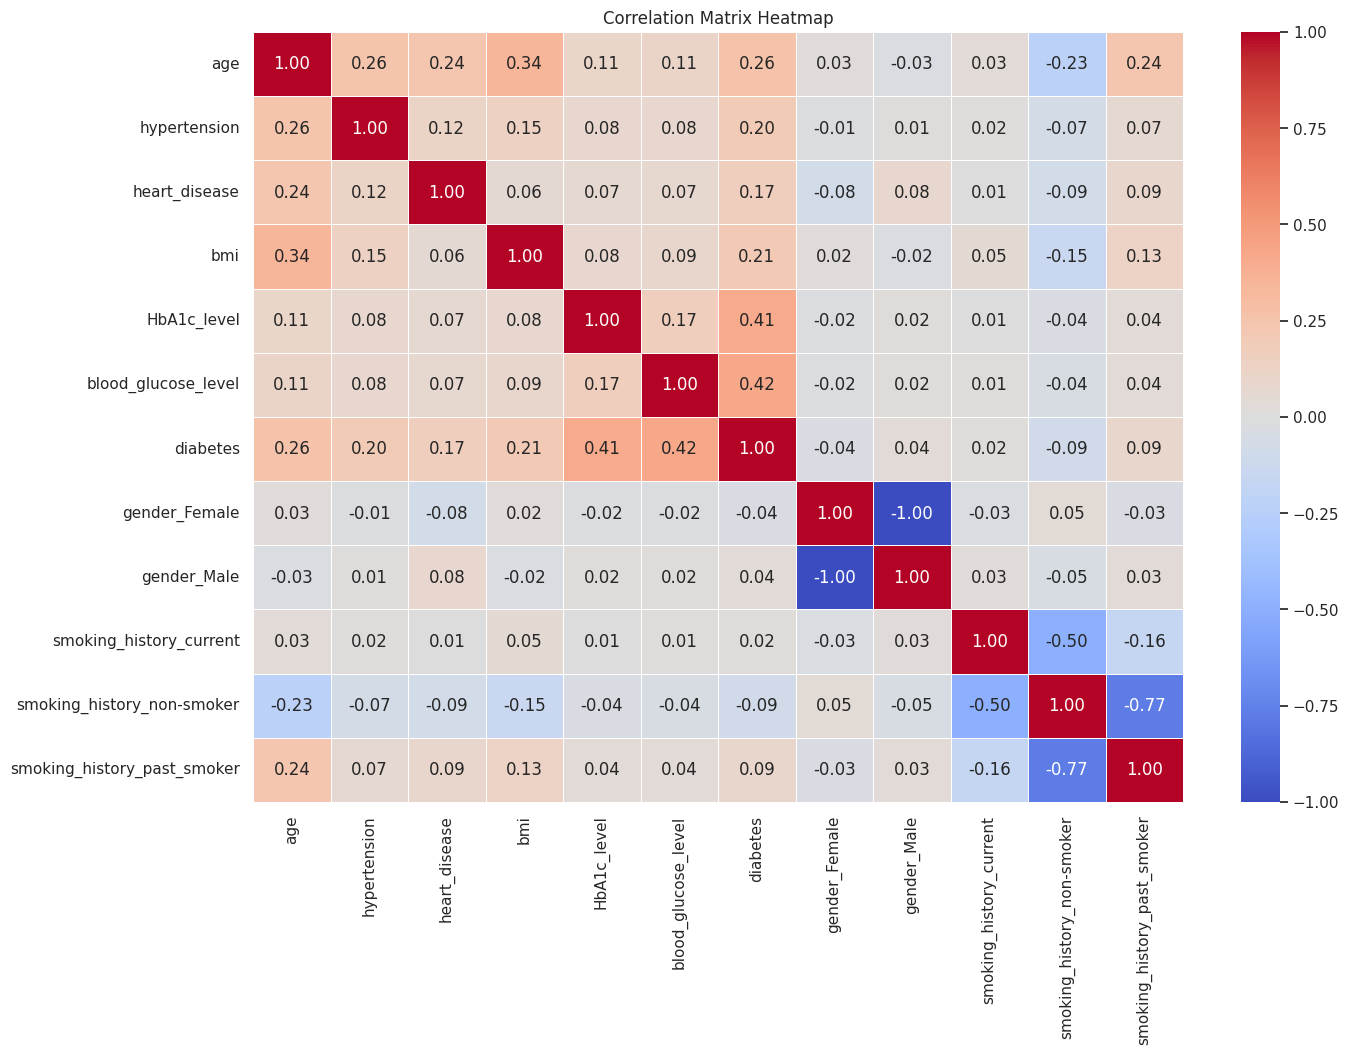

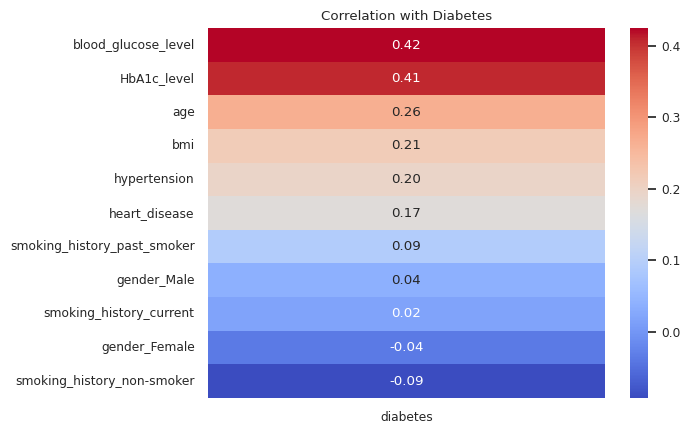

In [36]:
# Identify and one-hot encode any remaining categorical columns
# Remove 'gender' and 'smoking_history' as they have been encoded already
categorical_columns = []  # Add any other categorical columns here, excluding 'gender' and 'smoking_history'
for column in categorical_columns:
    data = perform_one_hot_encoding(data, column)

# Now you can compute the correlation matrix without error
correlation_matrix = data.corr()

# Graph I
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Graph II
# Create a heatmap of the correlations with the target column
target_corr = correlation_matrix['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.savefig("encoding- Correlation with Diabetes")
plt.show()

##**PREDICTIVE ANALYSIS**

1. Data Imbalance

  Dari hasil *Exploratory Data Analysis* (**EDA**), dataset menunjukkan ketidakseimbangan (dengan 9% kasus positif diabetes dan 91% kasus negatif), sehingga penting untuk menyeimbangkan data agar model tidak bias terhadap kelas mayoritas. Untuk tujuan ini, digunakan *Synthetic Minority Over-sampling Technique* (**SMOTE**), yang menghasilkan sampel sintetis untuk kelas minoritas.

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as imbPipeline # Use imbPipeline for resampling steps
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.svm import SVC # Import SVC
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [38]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

2. SCALER

  ***Preprocessing*** adalah langkah penting sebelum melatih model. Dalam kasus ini, fitur numerik dilakukan standardisasi (rata-rata dihilangkan dan di-skala ke variansi satuan), sementara fitur kategorikal di-one-hot encoding. Standardisasi tidak selalu diperlukan untuk semua model tetapi umumnya merupakan praktik yang baik. One-hot encoding diperlukan agar variabel kategorikal dapat dipahami dengan benar oleh model machine learning.

  StandardScaler dalam sklearn didasarkan pada asumsi bahwa data, Y, mengikuti distribusi yang mungkin tidak harus Gaussian (normal), tetapi tetap diubah sehingga memiliki nilai rata-rata 0 dan deviasi standar 1.

*   **Feature Selection with SelectKBest**
      
      **SelectKBest** digunakan untuk memilih fitur-fitur teratas yang memiliki kekuatan prediktif paling besar terhadap variabel target (diabetes). Parameter `score_func=f_classif` menunjukkan bahwa kita menggunakan nilai F ANOVA (sebagai ukuran signifikansi statistik) untuk mengurutkan setiap fitur, kemudian memilih 5 fitur terbaik. Hal ini membantu mengurangi dimensi data dan hanya menyimpan fitur-fitur yang paling berkorelasi dengan target.

In [39]:
# Reduce data to the top 5 features
feature_selector = SelectKBest(score_func=f_classif, k=5)

*   **Memisahkan Data menjadi Fitur dan Target**

    X didefinisikan sebagai semua kolom kecuali kolom diabetes, dan y ditetapkan sebagai variabel target (diasumsikan berada di kolom yang dinamai diabetes).

In [40]:
X = data.drop('diabetes', axis=1)  # Assuming 'diabetes' is the target column
y = data['diabetes']

*   **Pra-pemrosesan Data dengan ColumnTransformer**

    **ColumnTransformer** memungkinkan kita melakukan pra-pemrosesan yang berbeda untuk fitur numerik dan fitur kategorikal:
    
    **Fitur Numerik**: `StandardScaler()` menormalisasi fitur-fitur `age`, `bmi`, `HbA1c_level`, `blood_glucose_level`, `hypertension`, dan `heart_disease` agar memiliki rata-rata 0 dan standar deviasi 1, yang dapat meningkatkan kinerja model, terutama untuk model yang sensitif terhadap skala fitur.

    **Fitur Kategorikal**: `OneHotEncoder()` mengubah kolom kategorikal seperti gender dan smoking_history menjadi kolom indikator `biner. handle_unknown='ignore'` memastikan bahwa kategori baru atau tidak dikenal akan diabaikan.



In [41]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         [col for col in X.columns if col.startswith('gender') or col.startswith('smoking_history')])
    ])

*   **Menentukan dan Menginisialisasi Model**

    Sebuah dictionary models dibuat untuk mendefinisikan empat model klasifikasi berbeda:
    
      *   K-Nearest Neighbors (KNN):

          Menggunakan n_neighbors=5 untuk menentukan jumlah tetangga terdekat.

      *   Logistic Regression:
      
      Model klasifikasi linear yang sederhana namun efektif, dengan max_iter=500 agar model bisa konvergen meskipun data kompleks.

      *   Support Vector Machine (SVM):

      Menggunakan kernel linear untukperhitungan yang lebih cepat karena membutuhkan sumber daya yang lebih sedikit dibandingkan kernel non-linear.

    *   Random Forest:
    
      Menggunakan `n_estimators=50` (50 *decision tree*) dengan pemrosesan paralel melalui `n_jobs=-1` untuk efisiensi.




In [42]:
# Define optimized models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Support Vector Machine': SVC(kernel='linear'),  # Linear kernel for faster training
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1)  # Fewer trees, parallel processing
}

*   Definisi parameter grid

  Mendefinisikan grid hyperparameter untuk melakukan _hyperparameter tuning_ selama pelatihan model. Hal ini dilakukan sebagai tahap persiapan untuk melakukan `GridSearchCV`. `GridSearchCV` digunakan untuk mencoba setiap kombinasi nilai hyperparameter yang ada dalam grid dan mengevaluasi kinerja model untuk setiap kombinasi tersebut.

In [43]:
# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'Random Forest': { # Changed key to match the models dictionary
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7],  # Use the correct parameter name for KNN
        'classifier__weights': ['uniform', 'distance']
    }
}

   *   Pembagian Data Train dan Test
   
   `train_test_split()` membagi dataset menjadi set pelatihan dan set pengujian (80% pelatihan, 20% pengujian) dengan random_state=42.


In [44]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Pelatihan dan Evaluasi

*   Perform grid search and train

  Tahapan ini membahas mengenai model machine learning yang digunakan untuk menyelesaikan permasalahan. Proses ini dilakukan dengan menggunakan empat Algoritma.

Models

   - K-NN Algoritma K-Nearest Neighbor (K-NN) adalah algoritma machine learning yang sederhana dan mudah diterapkan, yang mana umumnya digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam supervised learning. Tujuan dari algortima K-NN adalah untuk mengidentifikasi nearest neighbor dari titik yang diberikan, sehingga dapat menetapkan label prediksi ke titik tersebut.

          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)


- `n_neighbors=5` : Parameter ini menentukan jumlah nearest neighbor yang akan dipertimbangkan saat membuat prediksi. Dalam hal ini, model akan mempertimbangkan 5 tetangga terdekat untuk mengklasifikasikan suatu titik data.

- Random Forest Random forest adalah kombinasi dari masing – masing tree atau pohon, yang kemudian dikombinasikan ke dalam satu model. Random Forest bergantung pada sebuah nilai vector acak dengan distribusi yang sama pada semua pohon yang masing masing tree memiliki kedalaman yang maksimal.

       'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1)
       
  - `n_estimators` = 50: Parameter ini menentukan jumlah pohon dalam hutan. Dalam hal ini, hutan terdiri dari 50 pohon. Menggunakan jumlah pohon yang lebih sedikit dapat membuat model lebih sederhana dan lebih cepat dalam pelatihan, meskipun akurasi mungkin sedikit menurun.
  - `n_jobs`= -1: Parameter ini menentukan jumlah inti CPU yang digunakan selama pelatihan. Dengan menetapkan nilai -1, maka semua inti yang tersedia akan digunakan, yang dapat mempercepat pelatihan, terutama dengan dataset yang besar.

- Logistic Regression
  
  Logistic Regression adalah algoritma pembelajaran mesin terawasi yang digunakan untuk tugas klasifikasi biner. Algoritma ini bekerja baik ketika hubungan antara fitur dan target bersifat linier.

      'Logistic Regression': LogisticRegression(max_iter=500)
      
  - `max_iter=500`: Parameter ini menentukan jumlah iterasi maksimum yang dapat digunakan solver untuk menemukan koefisien logistik yang optimal. Jika solver tidak dapat mencapai konvergensi dalam 500 iterasi, maka pelatihan akan dihentikan. Meningkatkan nilai max_iter bisa membantu ketika data yang digunakan besar atau modelnya kompleks.


- SVM adalah algoritma Supervised Machine Learning yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan mencari hyperplane optimal yang memisahkan kelas yang berbeda dalam ruang berdimensi tinggi. SVM juga dapat menggunakan kernel untuk memproyeksikan data ke dimensi yang lebih tinggi untuk klasifikasi non-linier.

      'Support Vector Machine': SVC(kernel='linear')

- `kernel`='linear': Parameter ini menentukan jenis kernel yang digunakan. Linear kernel berarti SVM akan menggunakan hyperplane linier untuk memisahkan kelas-kelas data. Ini lebih cepat secara komputasi dibandingkan dengan kernel non-linier seperti RBF (Radial Basis Function), dan berguna ketika data hampir bisa dipisahkan secara linier.

Menjalankan Grid Search untuk memaksimalkan hyperparameter dari beberapa model pembelajaran mesin dan mengevaluasinya berdasarkan **Precision, Recall, F1-Score, Accuracy, and Support** .


| **Metrik**     | **Sisi Positif**                                    | **Sisi Negatif**                               | **Kecocokan Penggunaan**                                                     |
|----------------|-----------------------------------------------------|------------------------------------------------|-------------------------------------------------------------------------------|
| **Precision**  | Mengurangi false positive                           | Tidak memperhatikan false negative             | Saat false positive berisiko tinggi .             |
| **Recall**     | Mengurangi false negative                           | Tidak memperhatikan false positive             | Saat false negative berisiko tinggi .          |
| **F1-Score**   | Menyeimbangkan precision dan recall                 | Tidak memperhatikan true negative              | Saat dataset tidak seimbang dan precision/recall sama pentingnya.            |
| **Accuracy**   | Mudah dihitung dan diinterpretasikan                | Menyesatkan untuk dataset tidak seimbang       | Saat dataset seimbang dan semua kelas sama pentingnya.                        |
| **Support**    | Memberikan informasi distribusi kelas               | Bukan metrik kinerja                           | Untuk memahami distribusi kelas dalam dataset.                                |



Running Grid Search for K-Nearest Neighbors...
Best hyperparameters for K-Nearest Neighbors: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

     Class 0       0.98      0.93      0.95     17525
     Class 1       0.53      0.80      0.64      1701

    accuracy                           0.92     19226
   macro avg       0.75      0.86      0.80     19226
weighted avg       0.94      0.92      0.93     19226



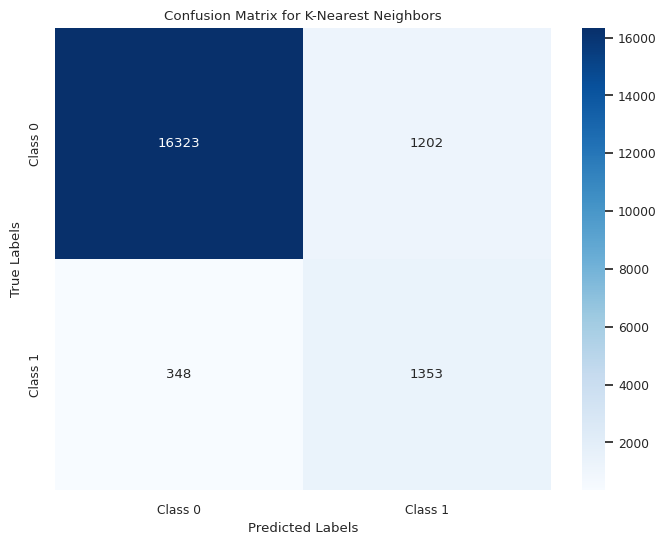

Grid Search for K-Nearest Neighbors completed.
------------------------------
Running Grid Search for Logistic Regression...
Best hyperparameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Class 0       0.98      0.94      0.96     17525
     Class 1       0.54      0.79      0.64      1701

    accuracy                           0.92     19226
   macro avg       0.76      0.86      0.80     19226
weighted avg       0.94      0.92      0.93     19226



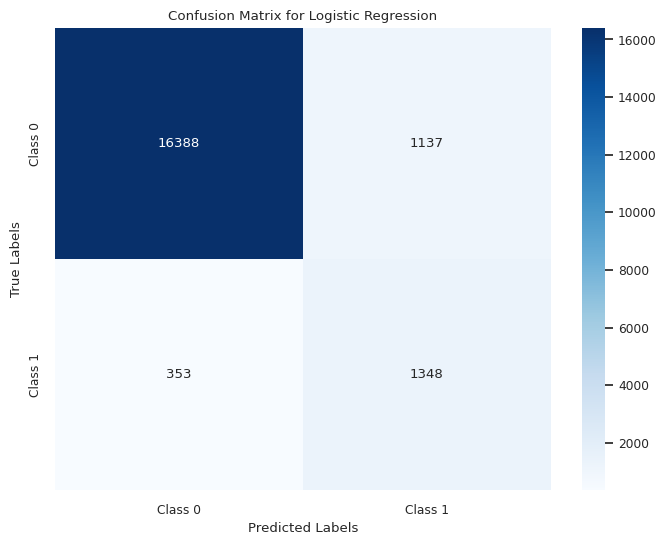

Grid Search for Logistic Regression completed.
------------------------------
Running Grid Search for Support Vector Machine...
Best hyperparameters for Support Vector Machine: {'classifier__C': 10, 'classifier__kernel': 'rbf'}

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.97     17525
     Class 1       0.62      0.81      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.80      0.88      0.83     19226
weighted avg       0.95      0.94      0.94     19226



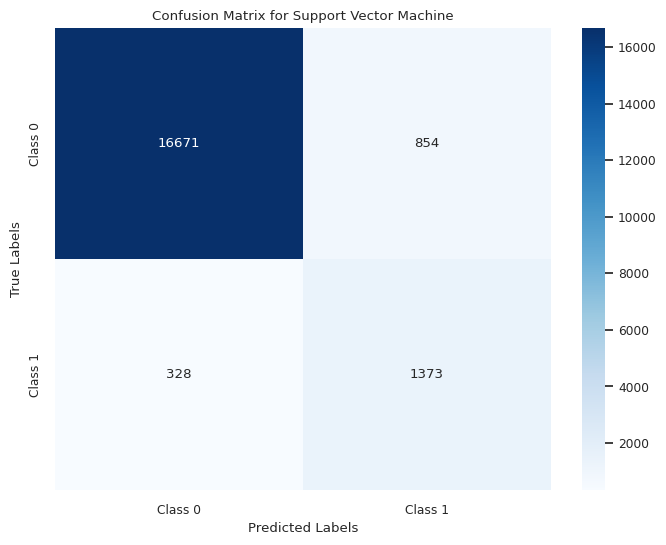

Grid Search for Support Vector Machine completed.
------------------------------
Running Grid Search for Random Forest...
Best hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}

Classification Report for Random Forest:
              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.97     17525
     Class 1       0.63      0.81      0.71      1701

    accuracy                           0.94     19226
   macro avg       0.81      0.88      0.84     19226
weighted avg       0.95      0.94      0.94     19226



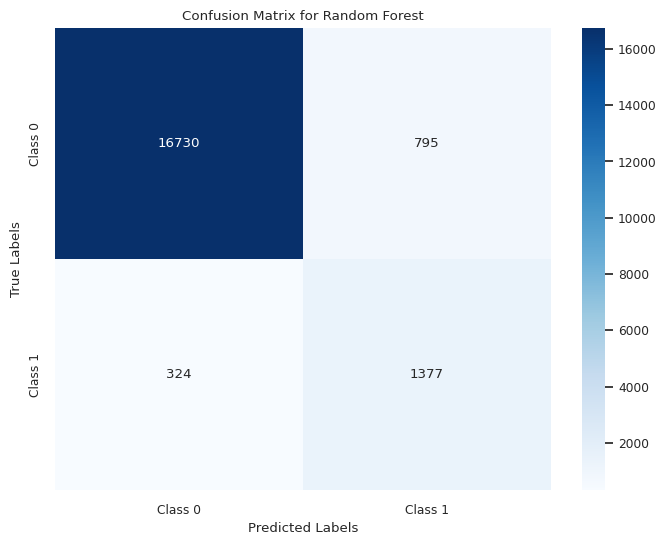

Grid Search for Random Forest completed.
------------------------------
Model Metrics Comparison:
                    Model  Precision    Recall  F1-Score  Accuracy  Support
0     K-Nearest Neighbors   0.939350  0.919380  0.926462  0.919380    19226
1     Logistic Regression   0.940299  0.922501  0.928872  0.922501    19226
2  Support Vector Machine   0.948484  0.938521  0.942169  0.938521    19226
3           Random Forest   0.950299  0.941798  0.944940  0.941798    19226

Sorted Model Metrics Comparison:
                    Model  Precision    Recall  F1-Score  Accuracy  Support
3           Random Forest   0.950299  0.941798  0.944940  0.941798    19226
2  Support Vector Machine   0.948484  0.938521  0.942169  0.938521    19226
1     Logistic Regression   0.940299  0.922501  0.928872  0.922501    19226
0     K-Nearest Neighbors   0.939350  0.919380  0.926462  0.919380    19226


<Figure size 1200x800 with 0 Axes>

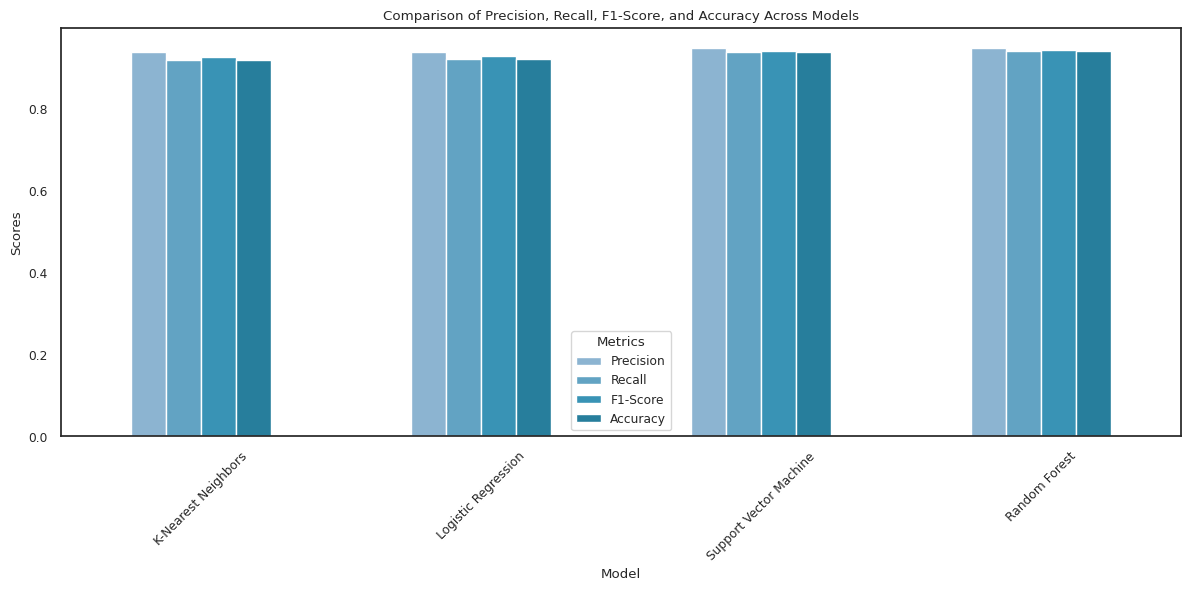

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Initialize results for metrics
metrics_results = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Support': []
}

# Perform Grid Search for each model
for model_name, model in models.items():
    print(f"Running Grid Search for {model_name}...")

    # Create a pipeline for each model
    clf = imbPipeline(steps=[('preprocessor', preprocessor),
                             ('over', over),
                             ('under', under),
                             ('classifier', model)])

    # Set up GridSearchCV with the parameter grid for the specific model
    grid_search = GridSearchCV(clf, param_grids[model_name], cv=5, scoring='roc_auc')

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters for the current model
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Predict on the test set
    y_test_pred = grid_search.predict(X_test)

    # Calculate metrics for the test set
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_test_pred)
    support = len(y_test)  # Total number of samples in the test set

    # Store the results
    metrics_results['Model'].append(model_name)
    metrics_results['Precision'].append(precision)
    metrics_results['Recall'].append(recall)
    metrics_results['F1-Score'].append(f1)
    metrics_results['Accuracy'].append(accuracy)
    metrics_results['Support'].append(support)

    # Print the classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1']))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print(f"Grid Search for {model_name} completed.")
    print("-" * 30)

# Convert metrics results to DataFrame
metrics_df = pd.DataFrame(metrics_results)

# Display the metrics comparison table
print("Model Metrics Comparison:")
print(metrics_df)

# Sort by F1-Score for better comparison
sorted_metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

# Display sorted results
print("\nSorted Model Metrics Comparison:")
print(sorted_metrics_df)

# Visualize the metrics using a bar plot
plt.figure(figsize=(12, 8))
metrics_df.set_index('Model')[['Precision', 'Recall', 'F1-Score', 'Accuracy']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Precision, Recall, F1-Score, and Accuracy Across Models')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


lewat

## Evaluasi Model

Metrik evaluasi yang digunakan pada project ini adalah Confusion Matrix. . Confusion matrix digunakan untuk memvisualisasikan kinerja model. Matriks ini menunjukkan jumlah prediksi true positive, true negative, false positive, dan false negative yang dihasilkan oleh model. Dengan diketahuinya true positive, true negative, false positive, dan false negative ; parameter seperti Precision, Recall dan F1-Score dapat dihitung.

Dengan kelebihan dan kekurangan parameter Precision, Recall, Accuracy  F1-Score , diketahui bahwa evaluasi dengan F1-Score lebih cocok digunakan pada pembahasan ini karena F1-Score cocok untuk data imbalance.


![F1 score.png](https://images.prismic.io/encord/0ef9c82f-2857-446e-918d-5f654b9d9133_Screenshot+%2849%29.png?auto=compress,format)

`Precision` fokus pada _false positives_ (kesalahan prediksi positif), sementara recall fokus pada _false negatives_ (kesalahan prediksi negatif). Pada data tidak seimbang, seringkali lebih penting untuk tidak melewatkan contoh kelas minoritas (recall tinggi), sekaligus menghindari prediksi positif yang salah (precision tinggi).

Maka dari itu `F1-Score` sangat berguna pada dataset tidak seimbang karena memberikan evaluasi yang seimbang terhadap kinerja model dengan mempertimbangkan baik precision maupun recall, mengurangi potensi hasil yang menyesatkan yang bisa muncul jika hanya menggunakan akurasi.

Dari tabel didapatkan nilai `F1-Score` paling tinggi didapatkan oleh Model **Random Forest**.






* Feature importance


Combined feature names (numeric + one-hot encoded):
['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'gender_Female', 'gender_Female', 'gender_Male', 'gender_Male', 'smoking_history_current', 'smoking_history_current', 'smoking_history_non-smoker', 'smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_past_smoker']

Feature Importances (sorted):
                        Feature  Importance
2                   HbA1c_level    0.408555
3           blood_glucose_level    0.318385
0                           age    0.133910
1                           BMI    0.082782
4                  hypertension    0.025165
5                 heart_disease    0.015726
14  smoking_history_past_smoker    0.002397
12   smoking_history_non-smoker    0.002152
13   smoking_history_non-smoker    0.002061
15  smoking_history_past_smoker    0.002038
9                   gender_Male    0.001446
6                 gender_Female    0.001347
8                 

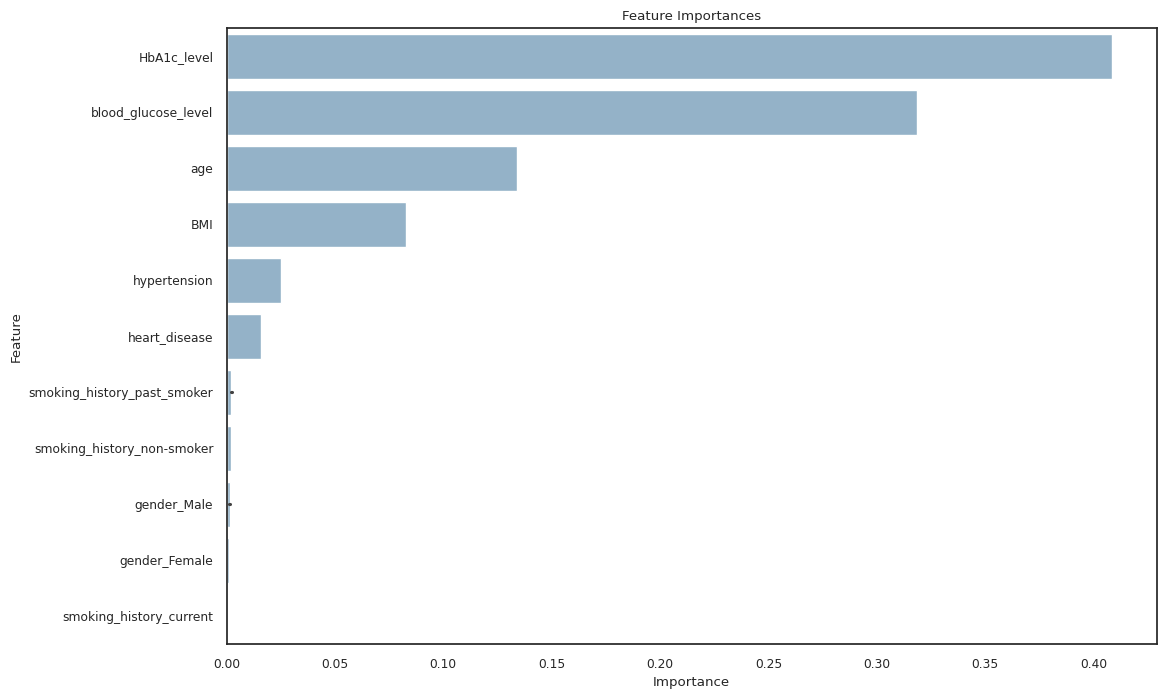

In [46]:
# After fitting the model, we use feature_names_in_ from the preprocessor
# to ensure consistency with how the encoder was fitted.
# Instead of accessing preprocessor.named_transformers_ directly,
# we access the fitted transformer through the grid_search's best estimator:
categorical_features = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].feature_names_in_

# Select the columns that correspond to gender and smoking history
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
gender_smoking_columns = [col for col in onehot_columns if col.startswith('gender_') or col.startswith('smoking_history_')]

# Remove the 'True' or 'False' from the feature names (if any)
gender_smoking_columns = [col.replace('_True', '').replace('_False', '') for col in gender_smoking_columns]

# Now add the numeric feature names
numeric_features = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Combine the one-hot columns and numeric columns
feature_names = numeric_features + gender_smoking_columns

# Print the final list of feature names
print("\nCombined feature names (numeric + one-hot encoded):")
print(feature_names)

# Check if the best estimator is a tree-based model that supports feature importances
best_classifier = grid_search.best_estimator_.named_steps['classifier']
if hasattr(best_classifier, 'feature_importances_'):
    # Get feature importances
    importances = best_classifier.feature_importances_

# Create a dataframe for feature importance
import pandas as pd # Make sure pandas is imported
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print("\nFeature Importances (sorted):")
print(importance_df)

# Plot the feature importances
import seaborn as sns # Make sure seaborn is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

  Pentingnya suatu fitur dihitung berdasarkan seberapa banyak simpul pohon yang menggunakan fitur tersebut mengurangi ketidakteraturan (impurity) di seluruh pohon dalam hutan.

Berikut adalah temuan kunci dari hasil pentingnya fitur:
* HbA1c_level adalah fitur yang paling penting dengan nilai penting sebesar 0,44. HbA1c adalah ukuran rata-rata kadar glukosa darah selama 2 hingga 3 bulan terakhir, sehingga tidak mengherankan jika ini merupakan prediktor signifikan untuk diabetes.
* Blood_glucose_level adalah fitur kedua yang paling penting dengan nilai penting sebesar 0,32. Hal ini sejalan dengan pengetahuan medis, karena kadar glukosa darah langsung digunakan untuk mendiagnosis diabetes.
*Age adalah fitur ketiga yang paling penting dengan nilai penting sebesar 0,14. Sudah diketahui bahwa risiko diabetes tipe 2 meningkat seiring bertambahnya usia.
*BMI menduduki peringkat keempat dalam hal pentingnya, yaitu sebesar 0,06. Indeks Massa Tubuh (BMI) adalah faktor risiko utama untuk diabetes, dan peranannya telah didokumentasikan dengan baik dalam literatur medis.

Selain itu, Model Random Forest menunjukkan kinerja terbaik secara keseluruhan berdasarkan metrik akurasi, presisi, recall, skor F1, yang mengindikasikan tingkat keandalan tinggi dalam generalisasi dan minimisasi kesalahan. Oleh karena itu, **Random Forest** menjadi pilihan terbaik apabila prioritasnya adalah akurasi dan performa seimbang di berbagai metrik walaupun diperlukan pengaturan hyperparameter lebih lanjut dan proses balancing data untuk dapat mempredikasi diabetes dengan lebih tepat.

> Add blockquote

